# Importando paquetes

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [79]:
pd.set_option('display.max_columns', 500)

# Leyendo el archivo

In [80]:
df = pd.read_pickle('EasyMoney_base.pkl', compression='zip')

In [81]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,cliente_activo
0,15891,2018-07-28,2018-07-28,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,59,0,-999.0,Madrid,Desconocido,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0.0,1
1,15891,2018-08-28,2018-07-28,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,59,0,-999.0,Madrid,Desconocido,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.000000,0,0,0.0,1
2,16063,2018-11-28,2018-11-19,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290323,1,0,0.0,0
3,16063,2018-12-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.258065,0,0,0.0,0
4,16063,2019-01-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.258065,0,0,0.0,0


# EDA 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 49 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pk_cid                  int64         
 1   pk_partition            datetime64[ns]
 2   entry_date              datetime64[ns]
 3   entry_channel           category      
 4   active_customer         int64         
 5   segment                 category      
 6   short_term_deposit      int64         
 7   loans                   int64         
 8   mortgage                int64         
 9   funds                   int64         
 10  securities              int64         
 11  long_term_deposit       int64         
 12  em_account_pp           int64         
 13  credit_card             int64         
 14  payroll                 int64         
 15  pension_plan            int64         
 16  payroll_account         int64         
 17  emc_account             int64         
 18  de

In [83]:
df['salary_categ']=df.salary_categ.astype('category')
diferencias=[variable for variable in df.columns if variable.startswith('dif_')]
df[diferencias]=df[diferencias].astype('int64')

In [84]:
categoricas= ['entry_channel','segment','country_id','region_code','salary_categ','gender','region_name']
ids=['pk_cid']
dates=['pk_partition','entry_date']
discretas=[variable for variable in (df.select_dtypes(include='int64').columns) if variable not in ids+dates]
#aquí creo una lista con todas las variables int64, que son casi todas booleanas, y excluyo el id y las fechas

In [85]:
numericas=df.select_dtypes(include='float64').columns

## Variables categóricas

In [86]:
def grafico_barras(dataframe, lista):
    for variable in lista:
        val_counts = dataframe[variable].value_counts()
        plt.figure(figsize=(12, 5))
        plt.bar(val_counts.index, val_counts.values)
        plt.title(f'Distribución de {variable}')
        plt.xticks(rotation=90)
        plt.show()

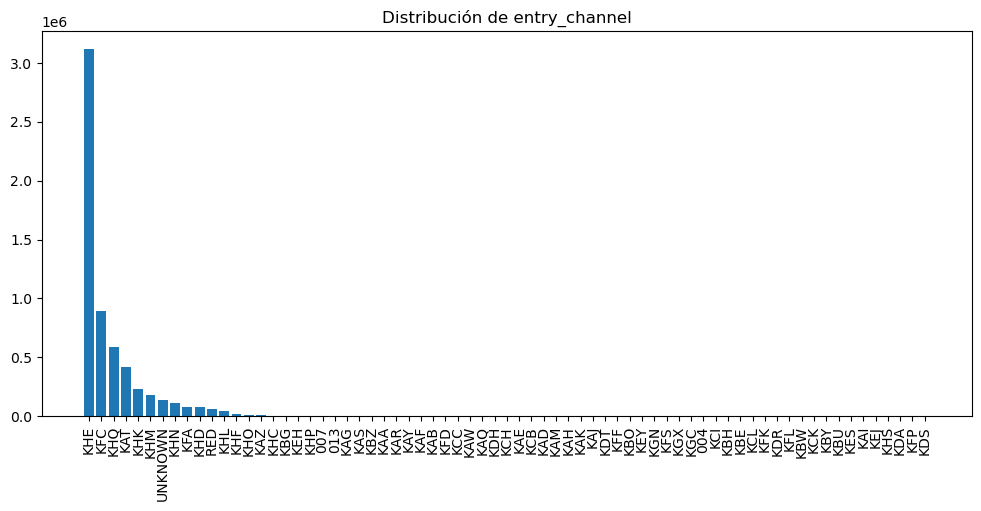

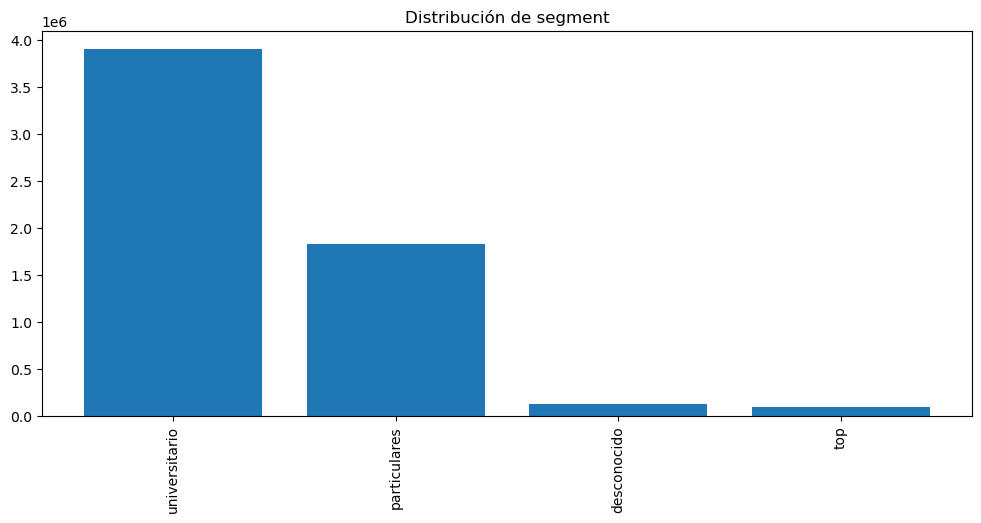

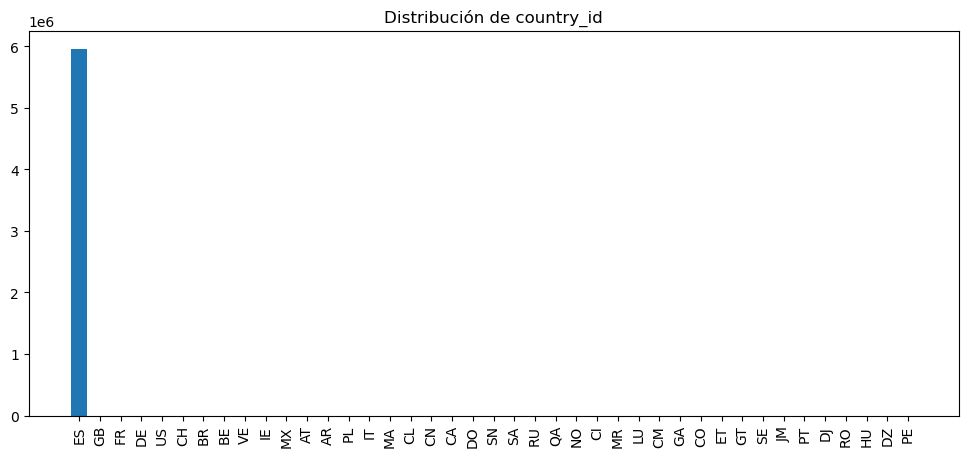

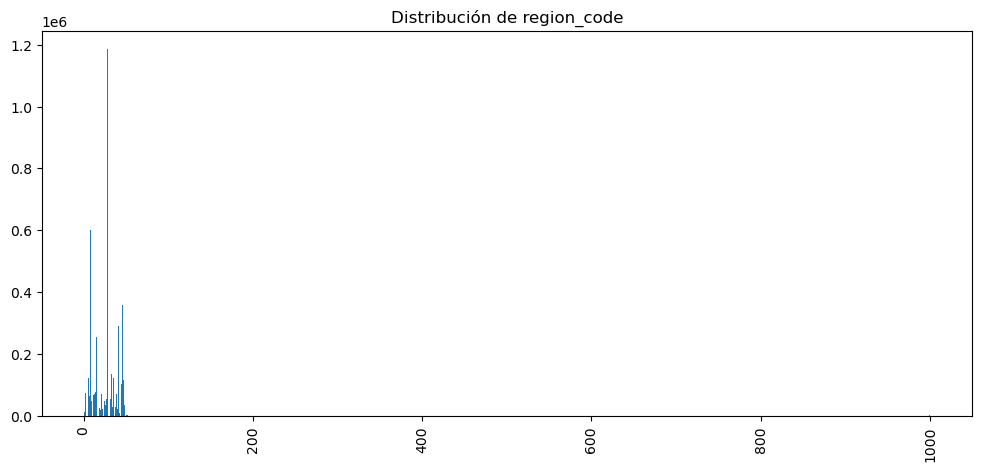

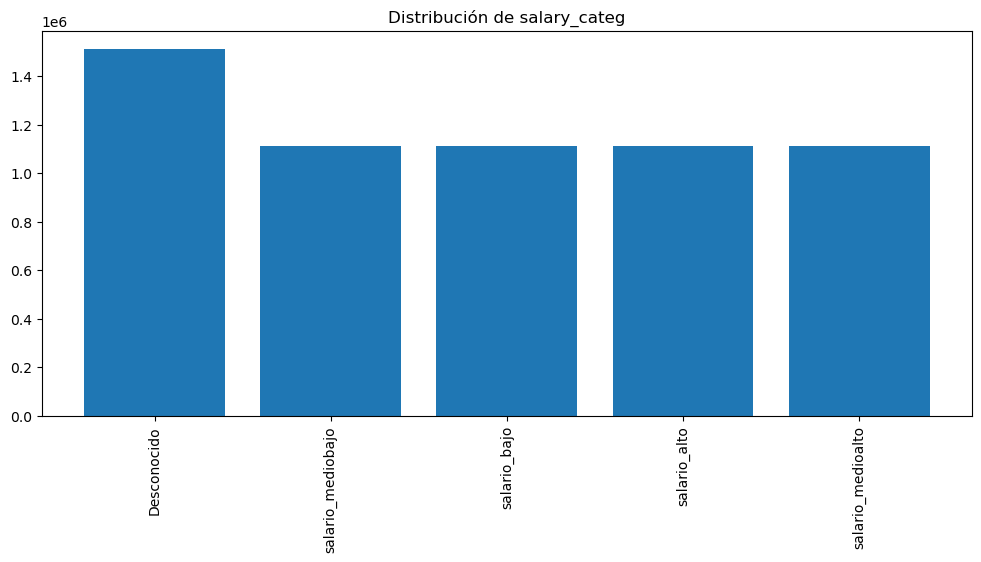

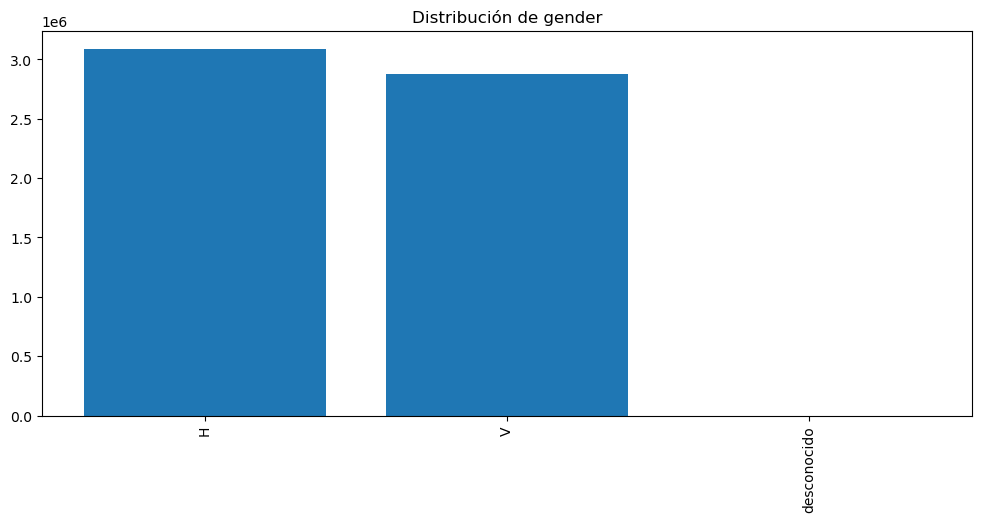

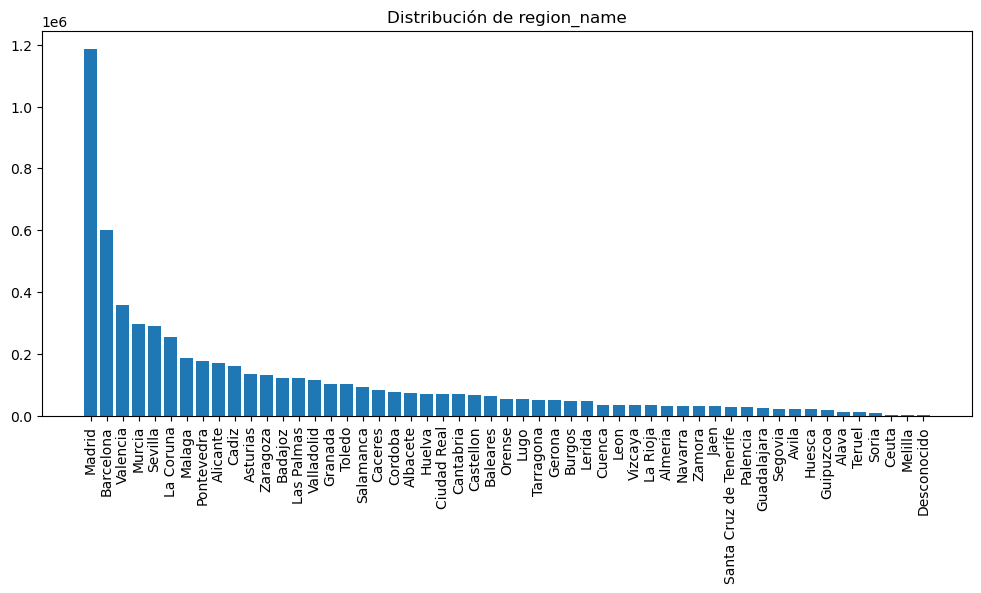

In [87]:
grafico_barras(df,categoricas)

Podemos observar lo siguiente:
- Los 5 canales de entrada más frecuentes son KHE, KFC, KHQ, KAT y KHK 
- El segmento más frecuente es el universitario.
- El país del que provienen la mayoría de datos es España, y dentro de esta de Madrid, seguida por Barcelona, Valencia, Murcia, Sevilla y La Coruña.
- La muestra está balanceada en relación al género.
- En la muestra predominan individuos con un salario medio bajo (primer cuantil de esta variable).

## Variables discretas

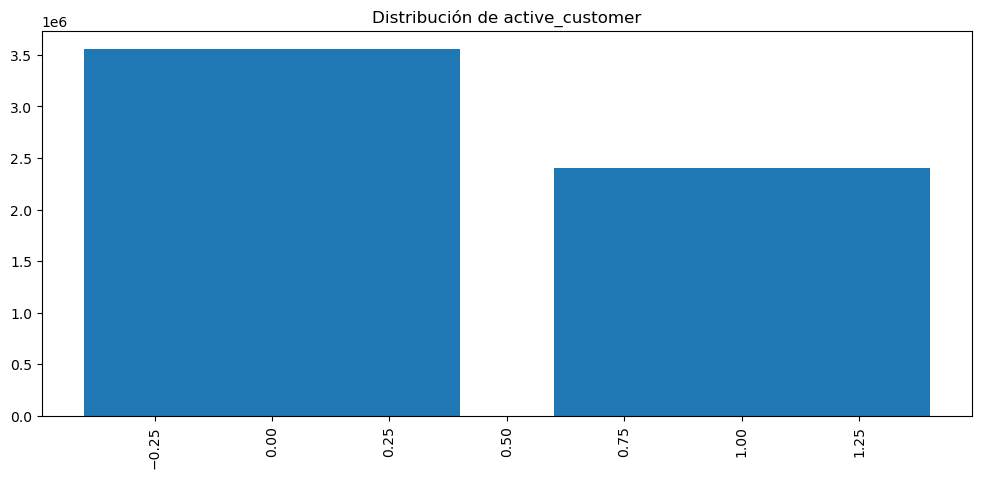

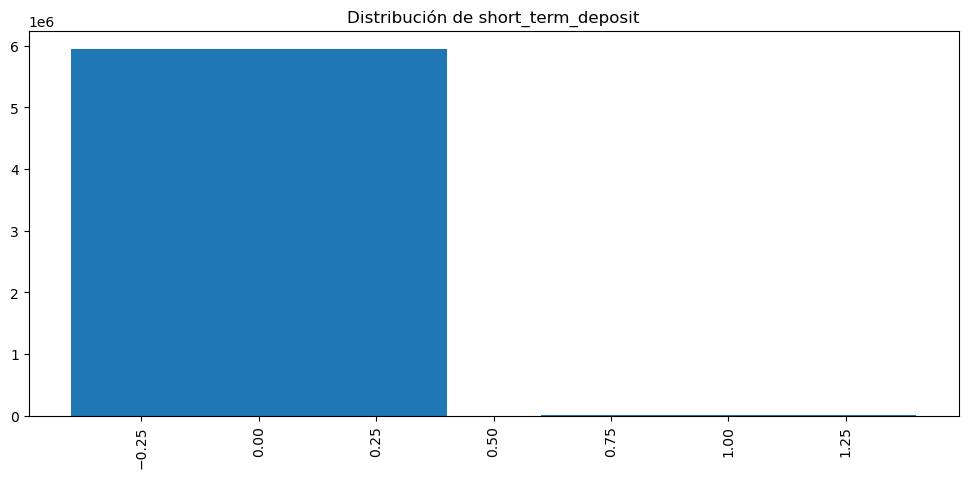

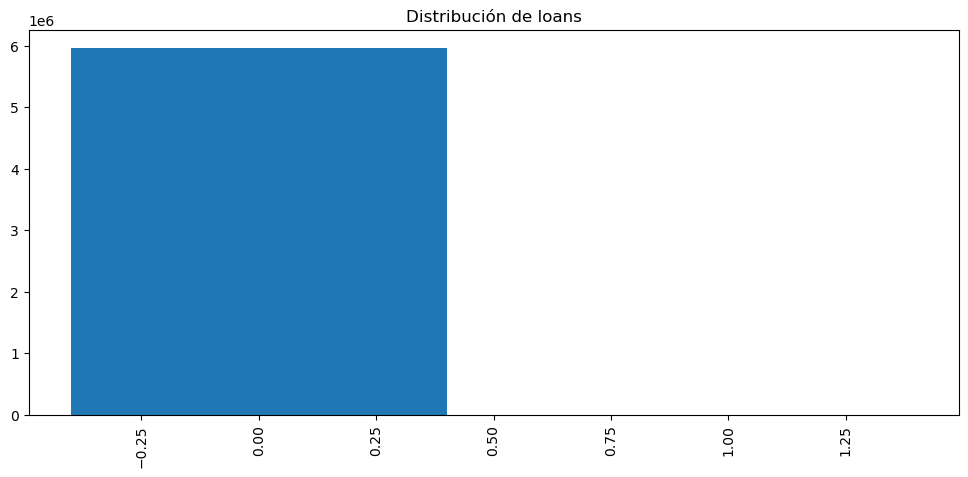

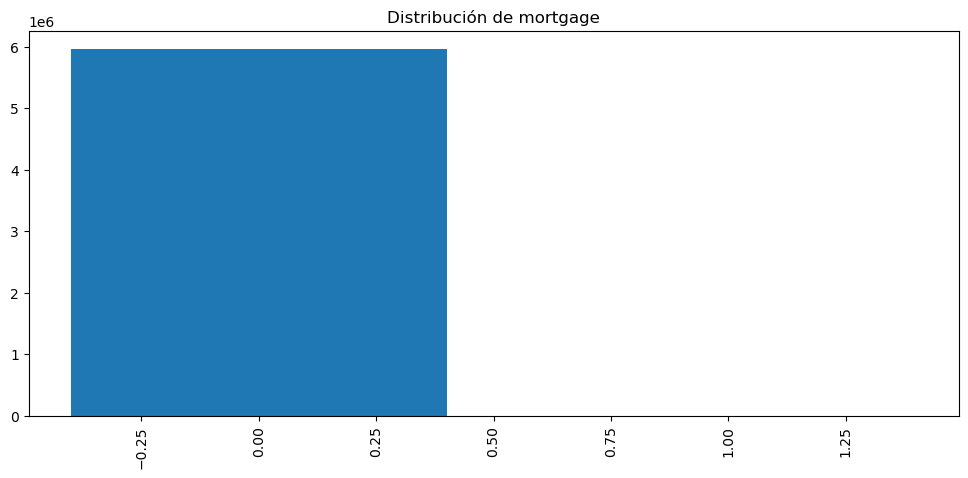

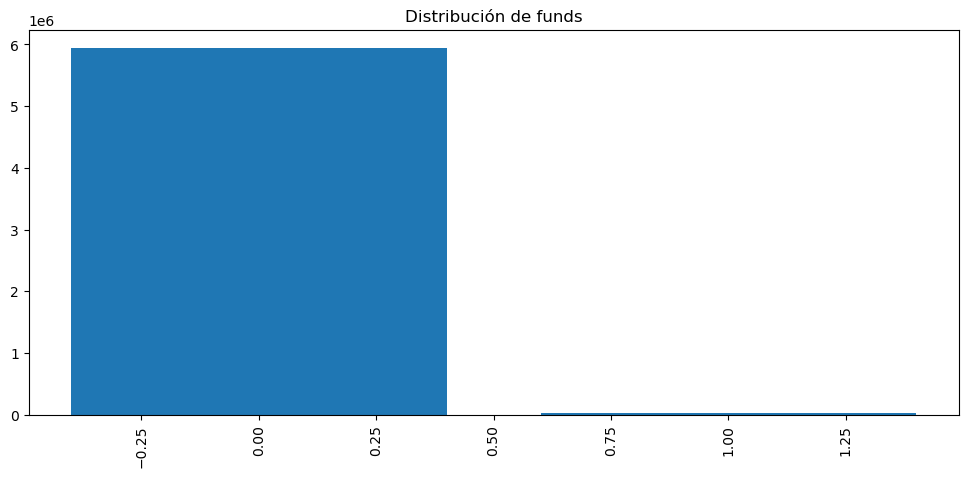

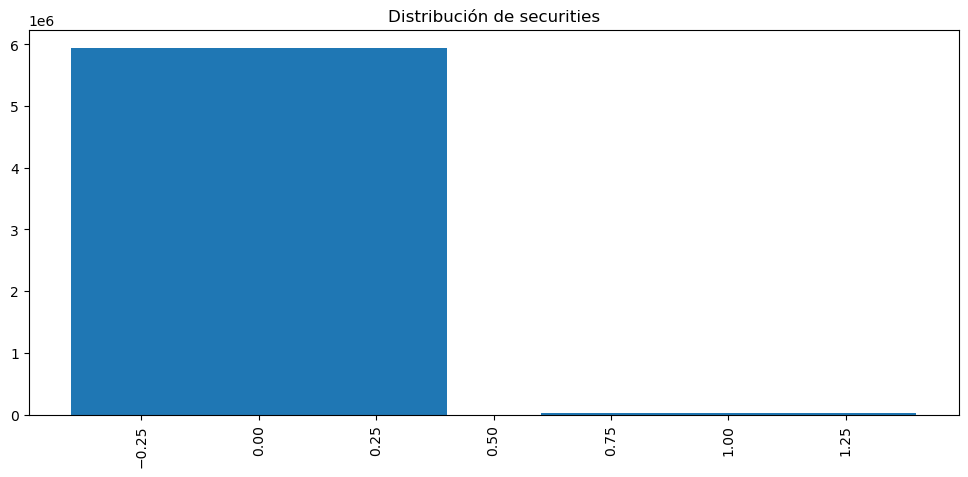

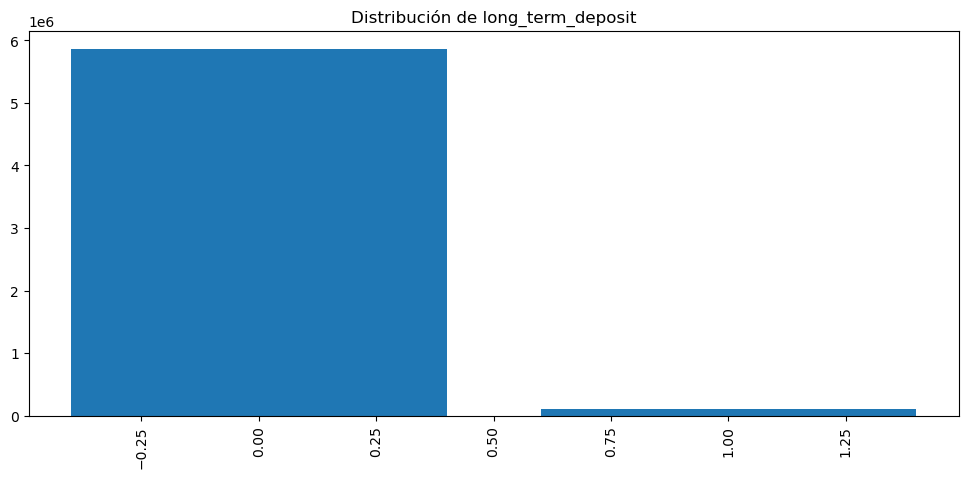

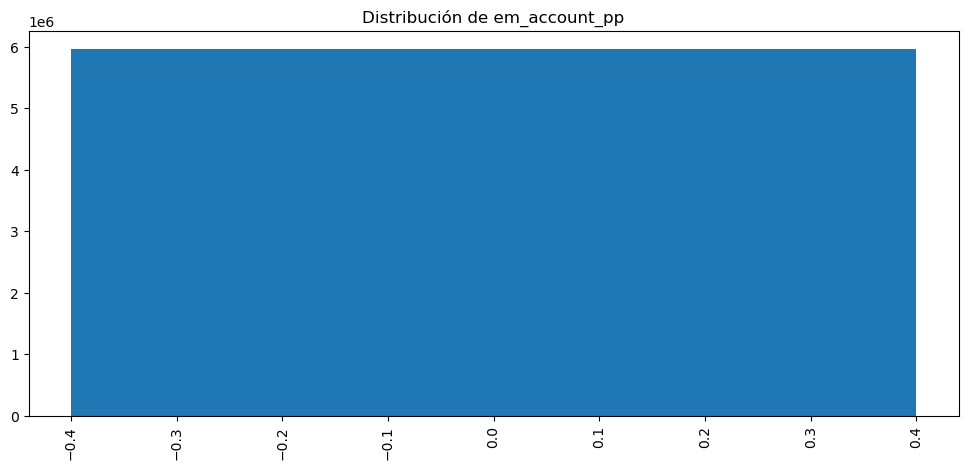

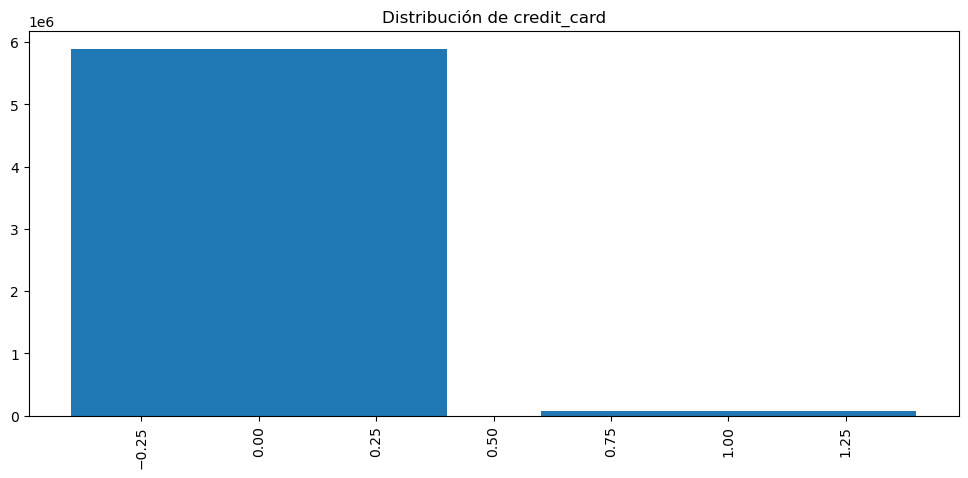

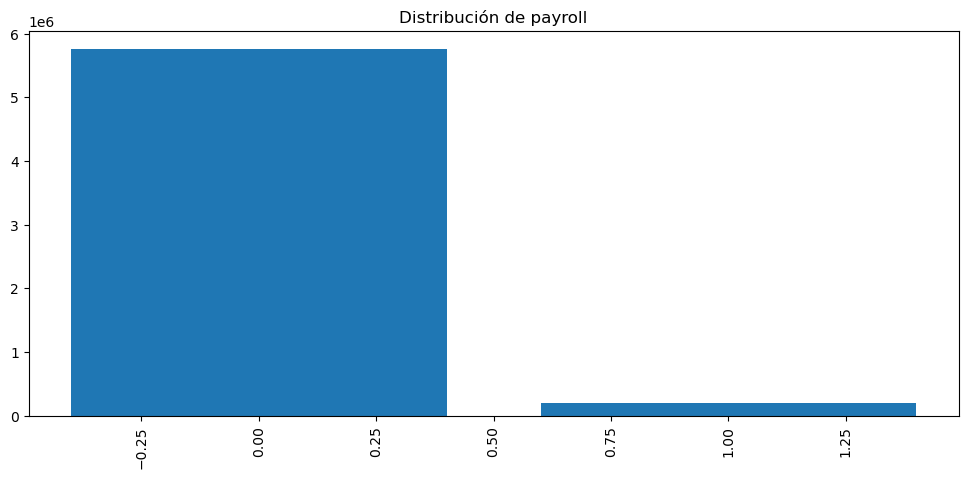

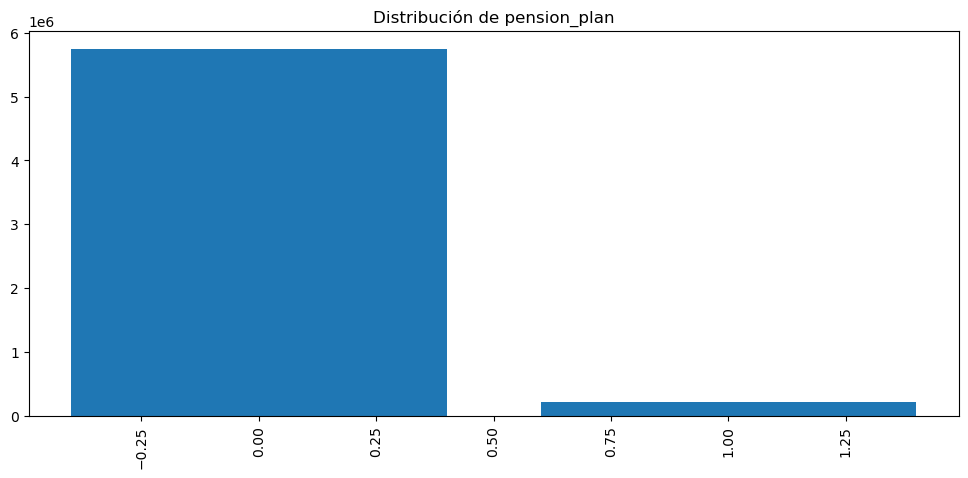

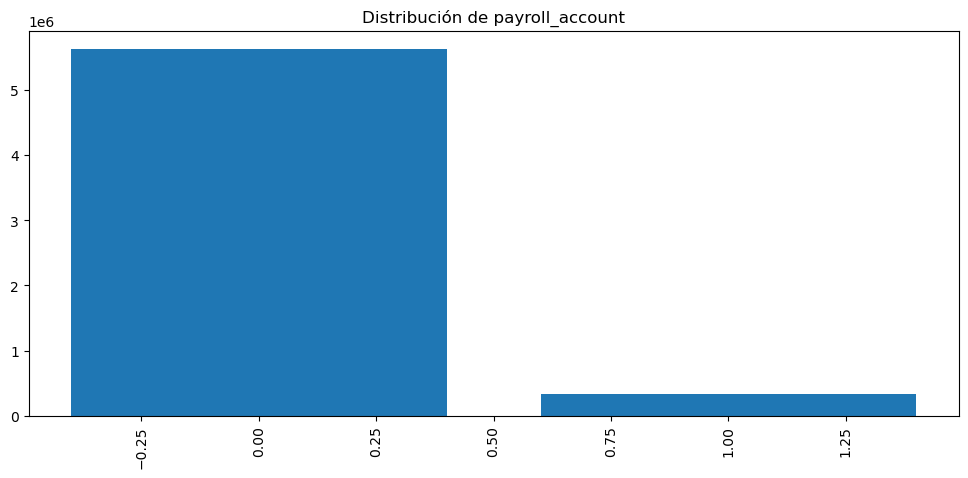

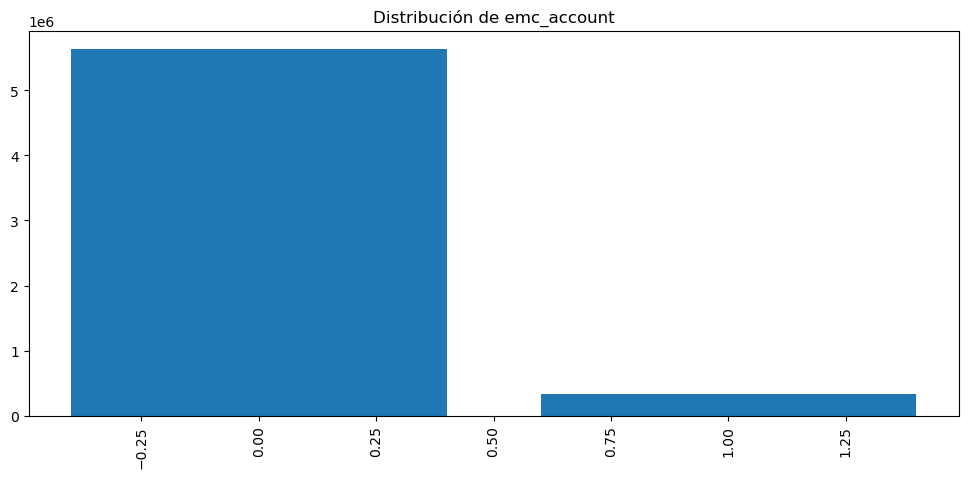

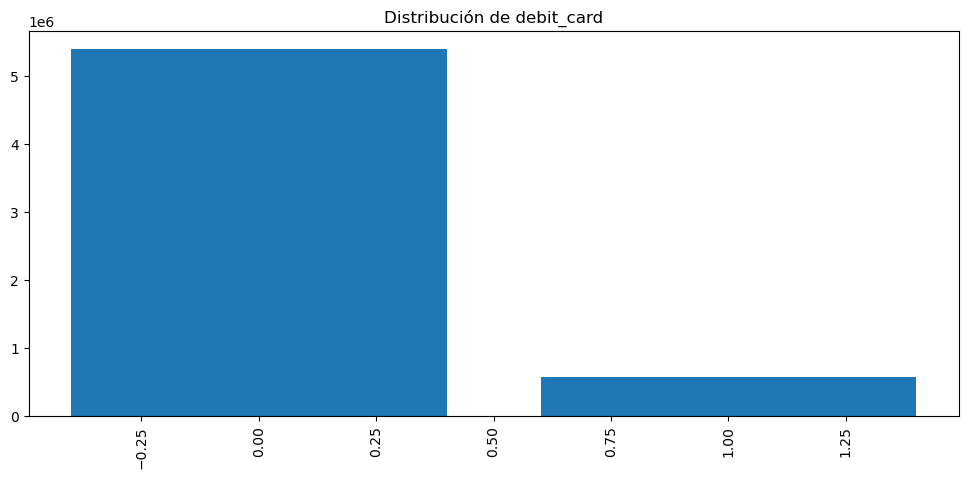

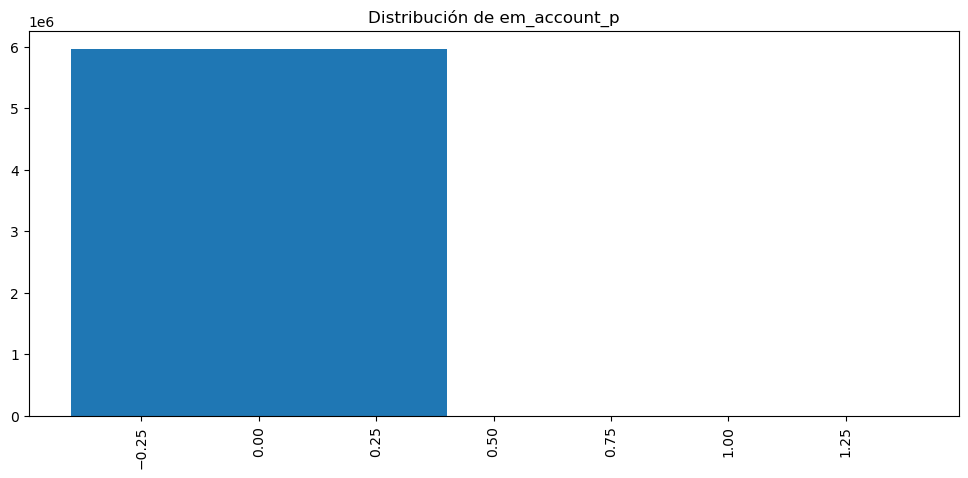

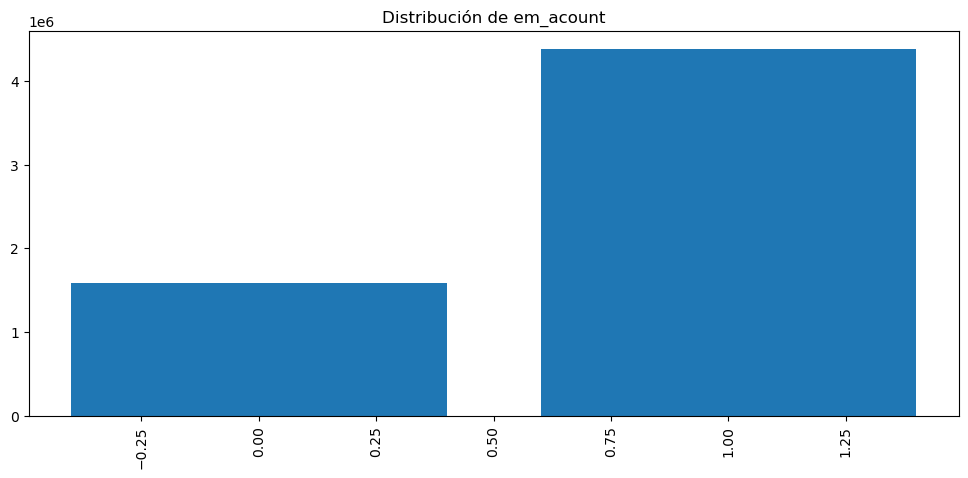

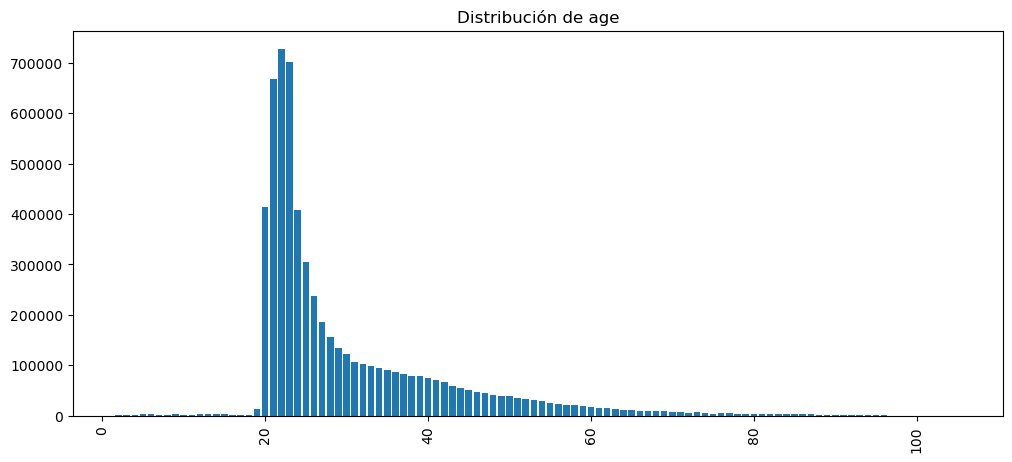

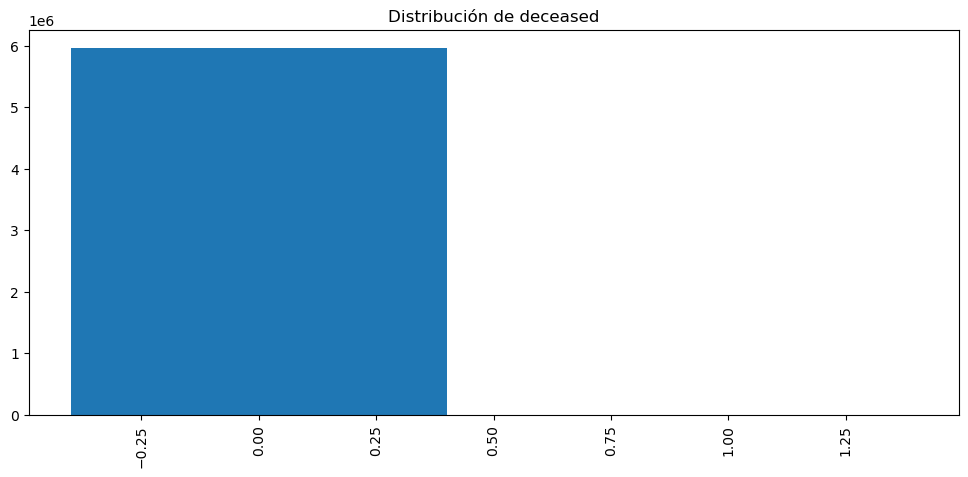

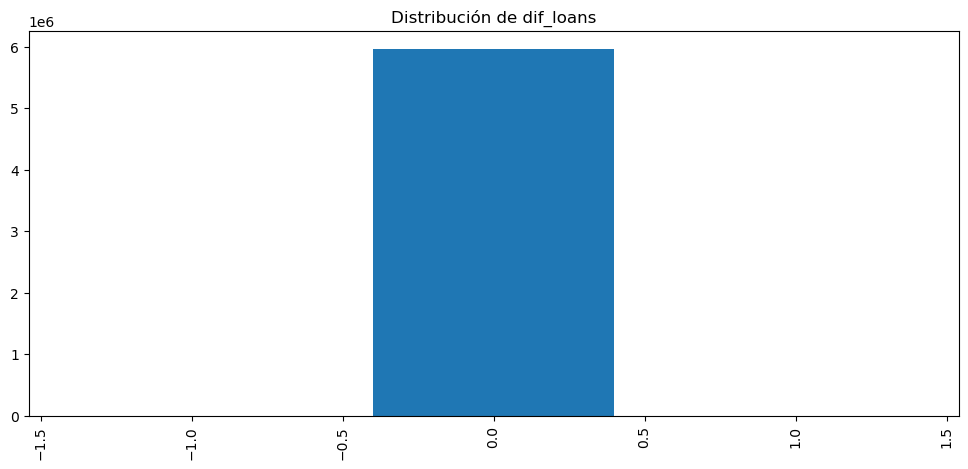

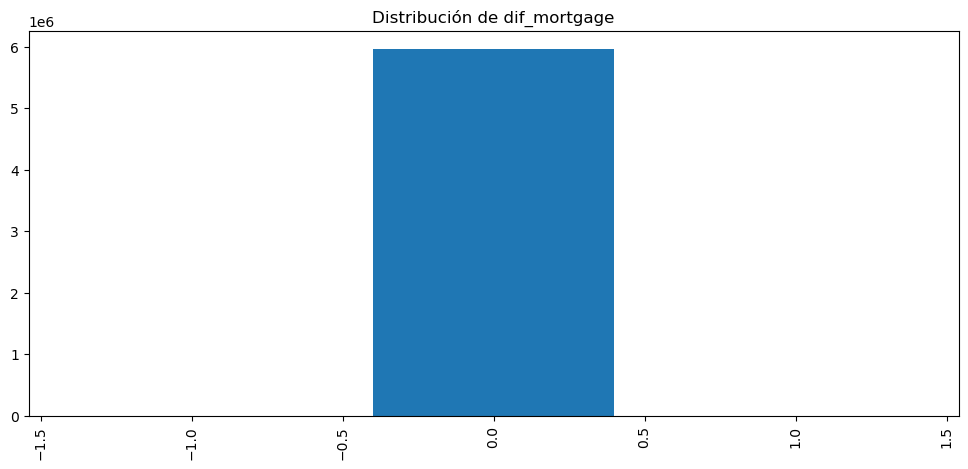

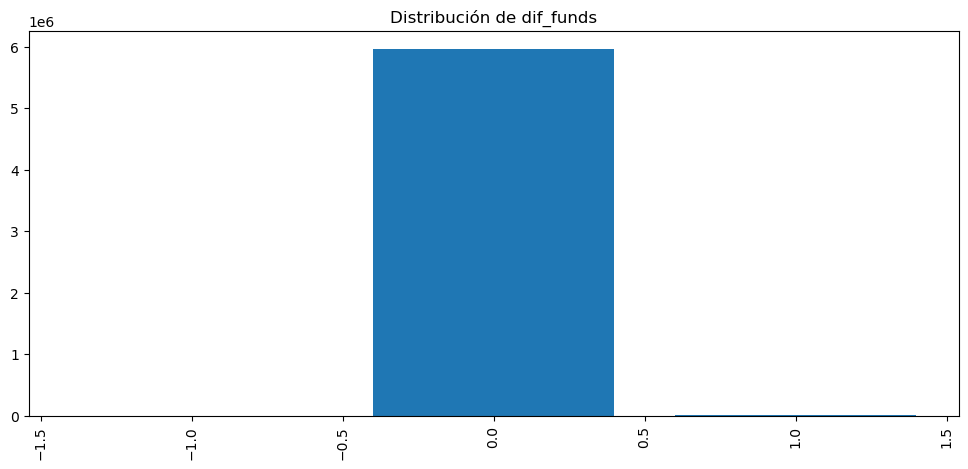

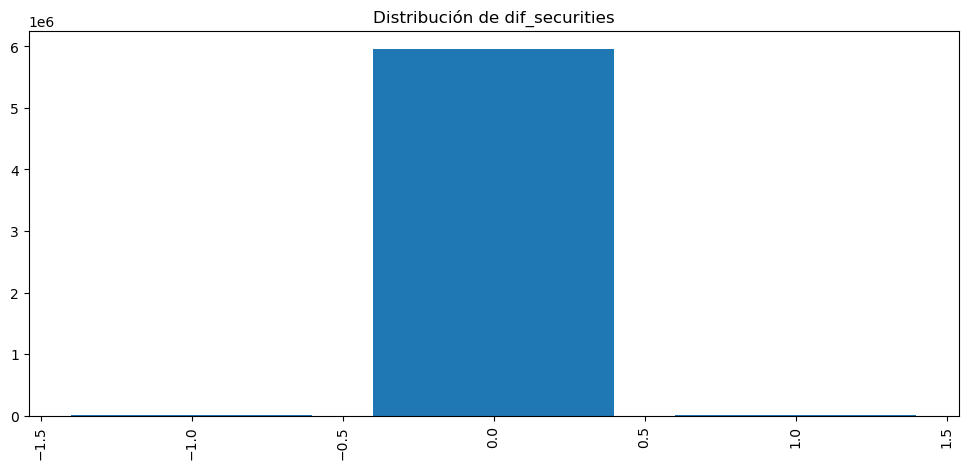

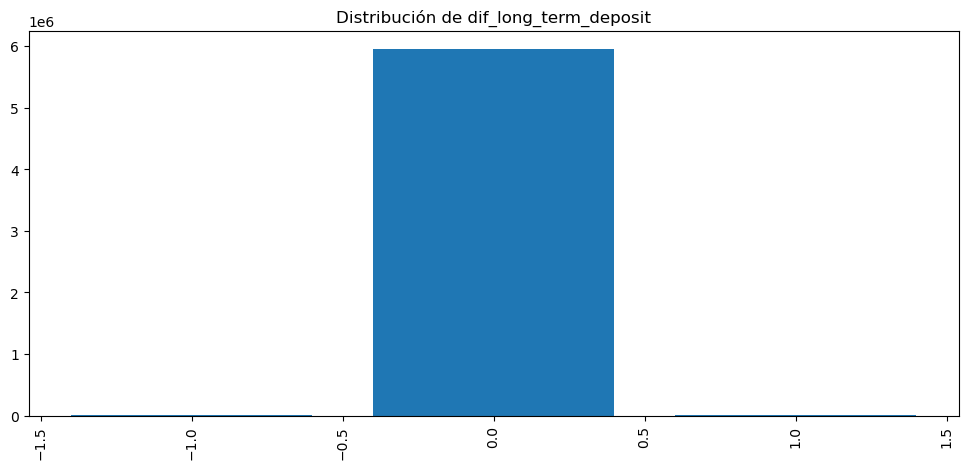

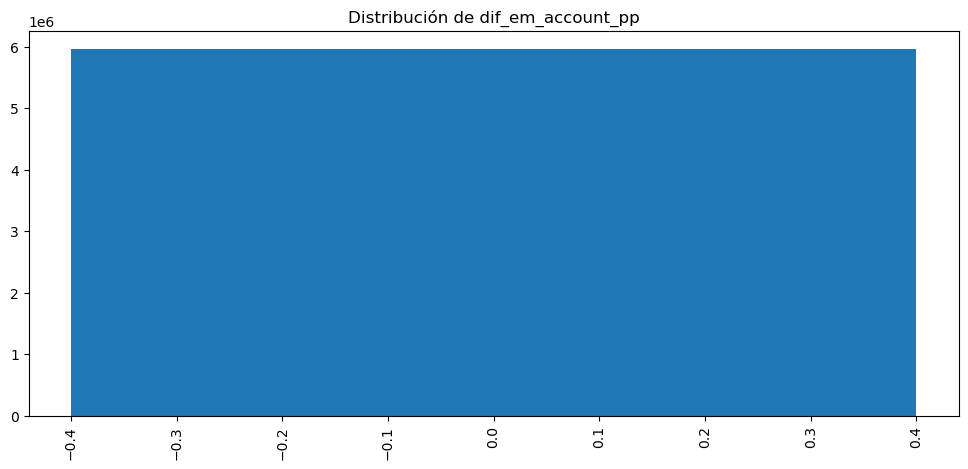

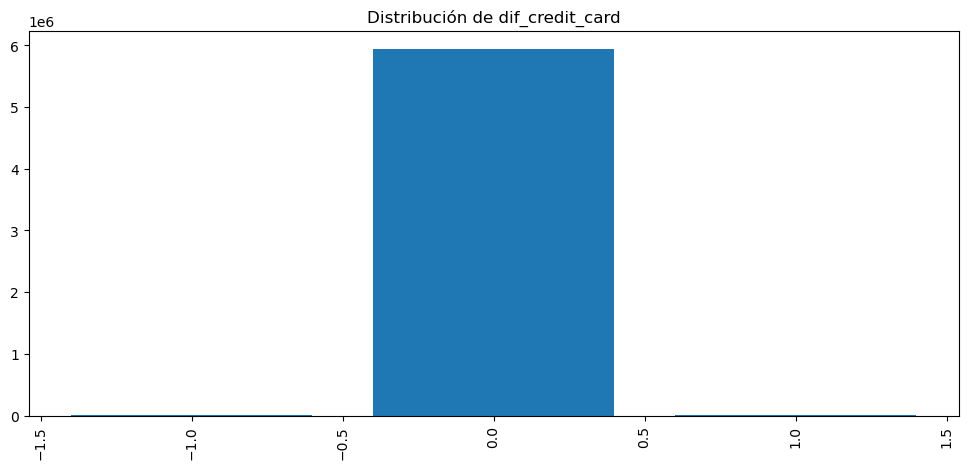

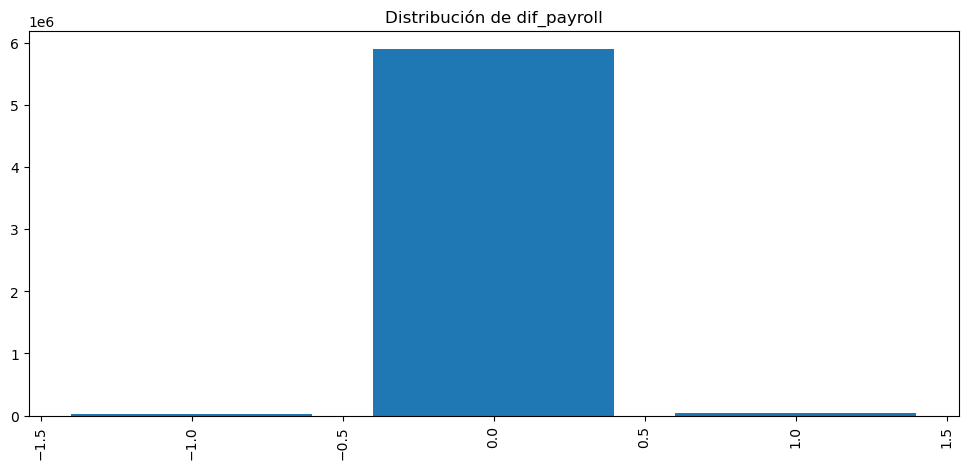

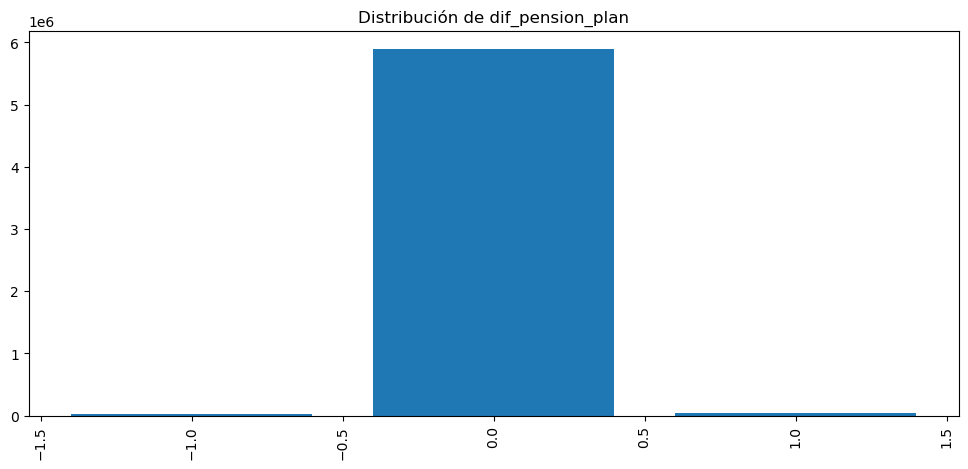

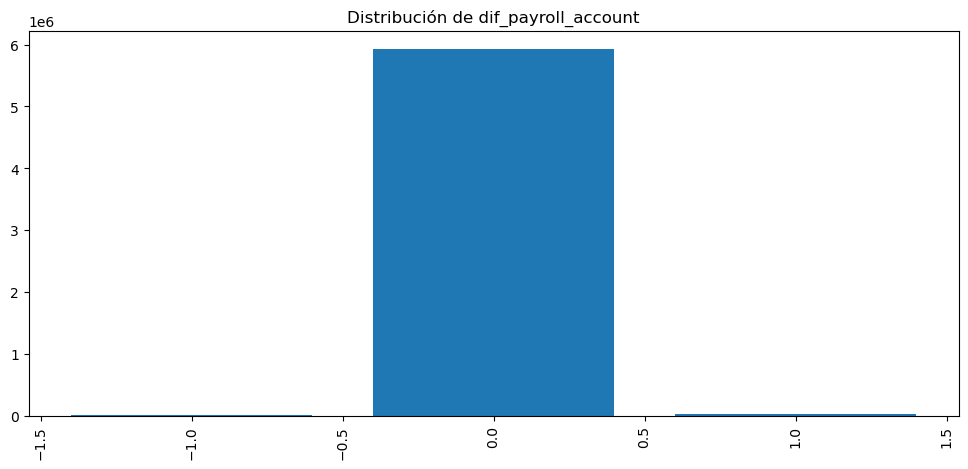

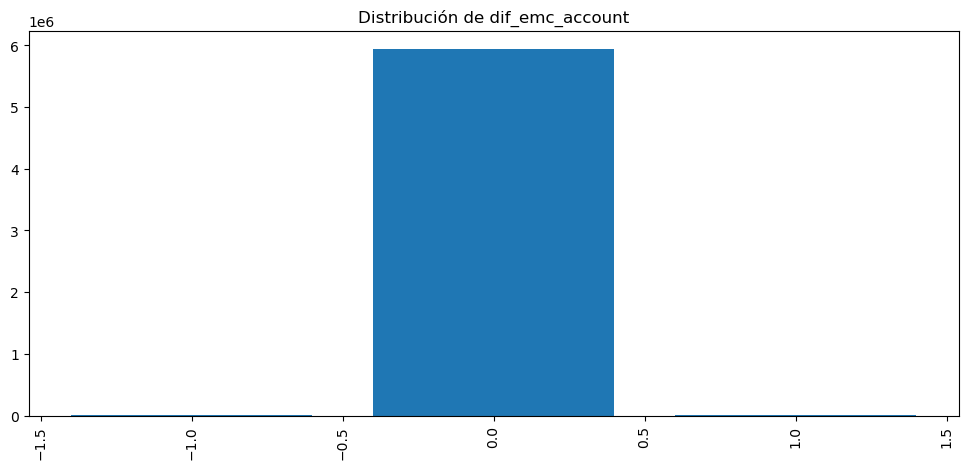

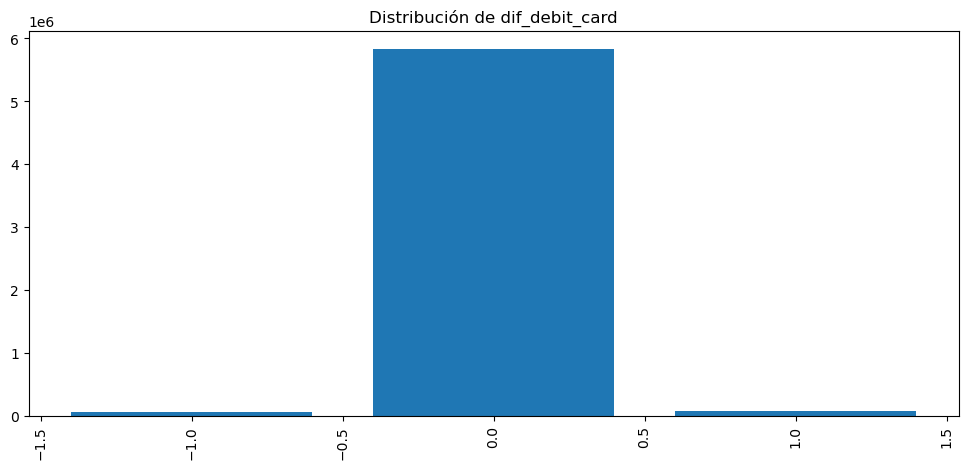

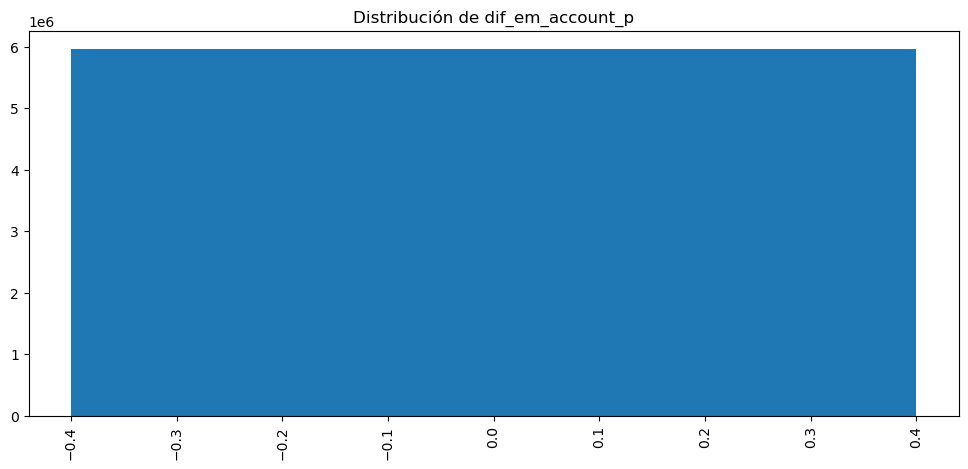

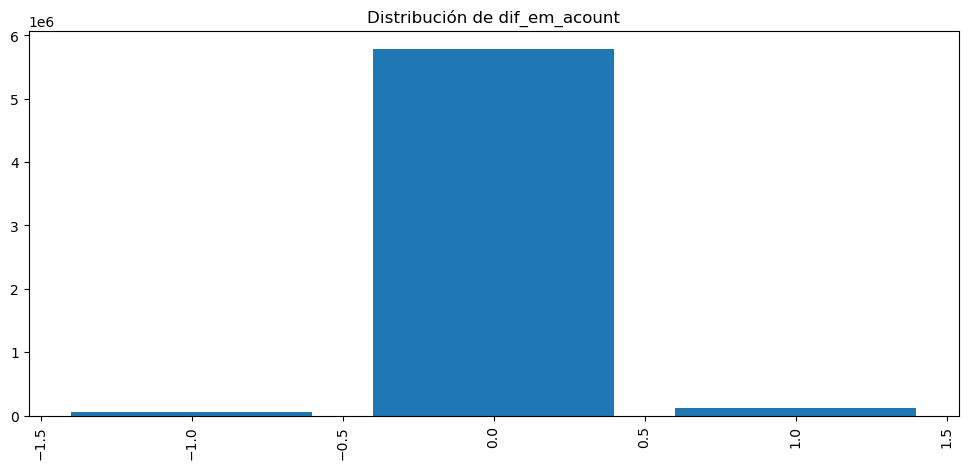

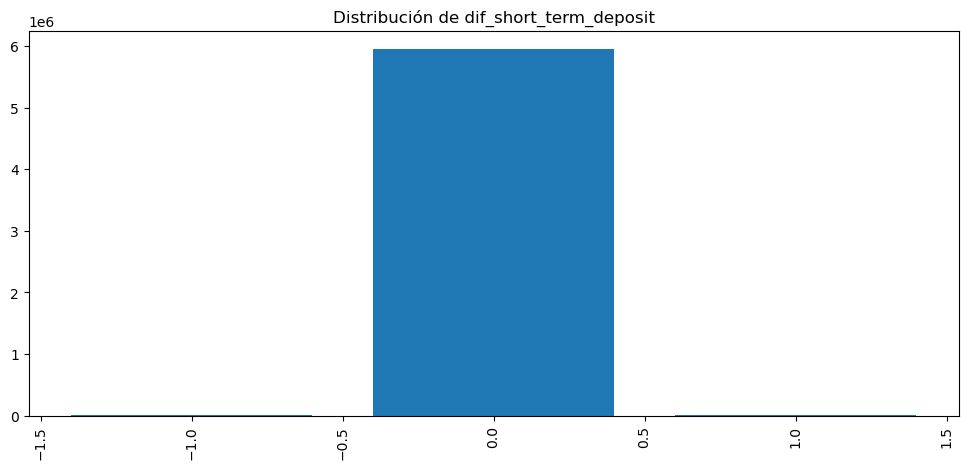

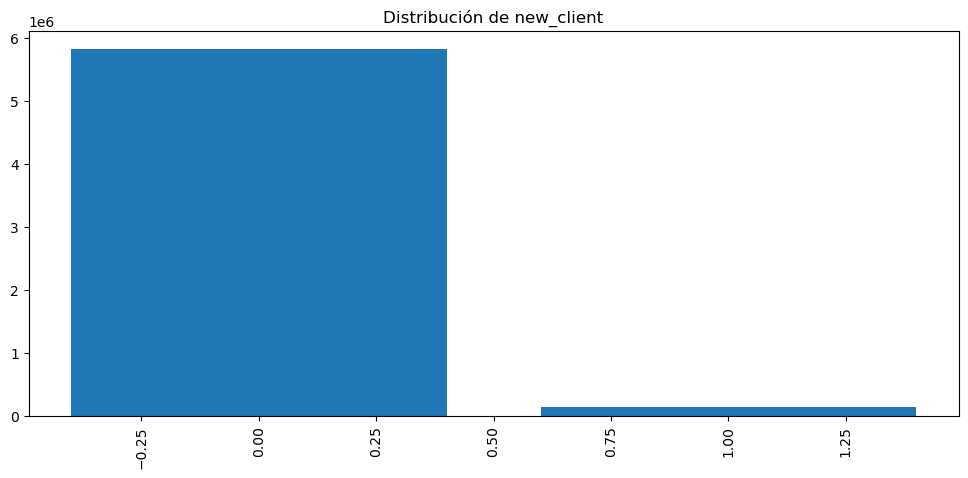

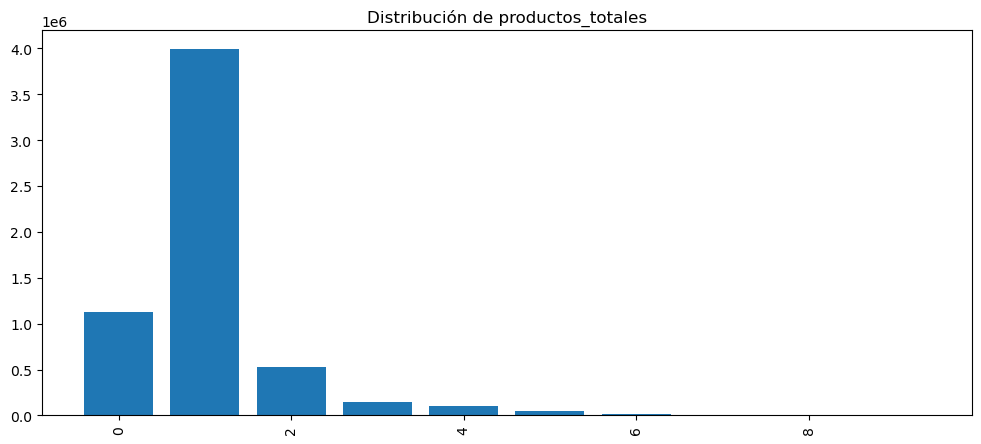

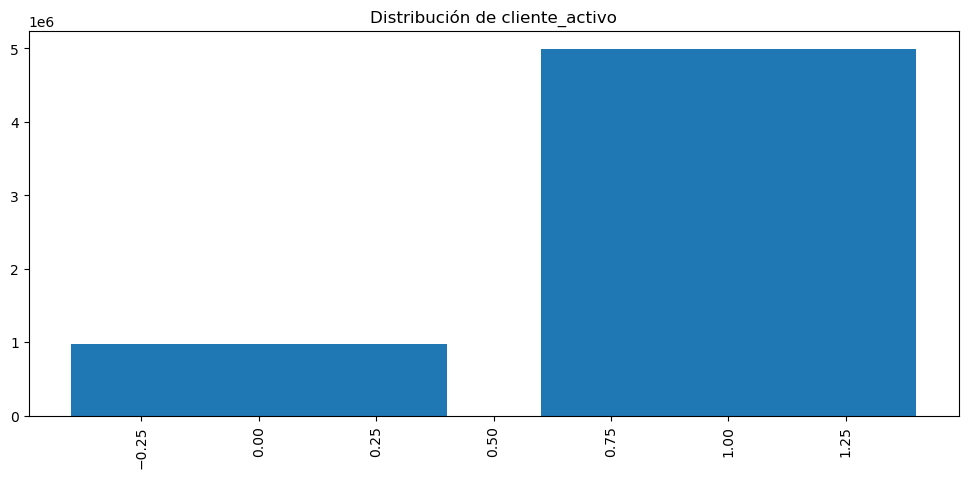

In [88]:
grafico_barras(df,discretas)

## Variables concretas

### Evolución ingresos

Primero, vamos a ver la evolución temporal de los ingresos totales

In [89]:
df_fechas=df.groupby('pk_partition')['ingresos_producto'].sum()

In [90]:
df_fechas.head(10)

pk_partition
2018-01-28     33420.0
2018-02-28    254660.0
2018-03-28    258740.0
2018-04-28    238220.0
2018-05-28    230220.0
2018-06-28    308650.0
2018-07-28    380060.0
2018-08-28    365730.0
2018-09-28    441450.0
2018-10-28    480890.0
Name: ingresos_producto, dtype: float64

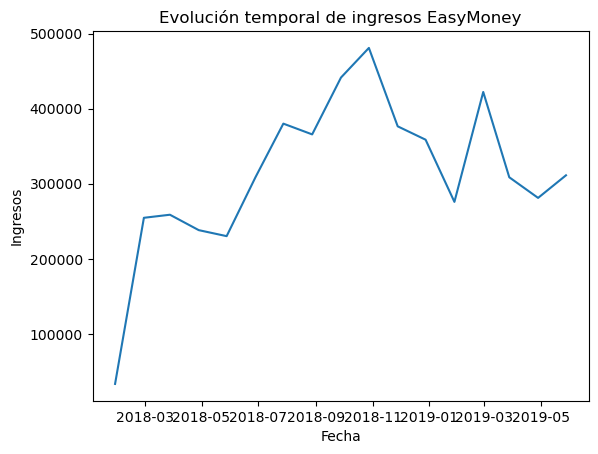

In [91]:
plt.plot(df_fechas.index,df_fechas.values)
plt.title('Evolución temporal de ingresos EasyMoney')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.show()

### Evolución clientes nuevos

In [92]:
df_clientes_nuevos=df.groupby('pk_partition')['new_client'].sum().reset_index()

In [93]:
df_clientes_nuevos

,pk_partition,new_client
0,2018-01-28,2543
1,2018-02-28,2720
2,2018-03-28,2368
3,2018-04-28,2032
4,2018-05-28,2301
5,2018-06-28,1918
6,2018-07-28,12995
7,2018-08-28,16677
8,2018-09-28,20252
9,2018-10-28,28303


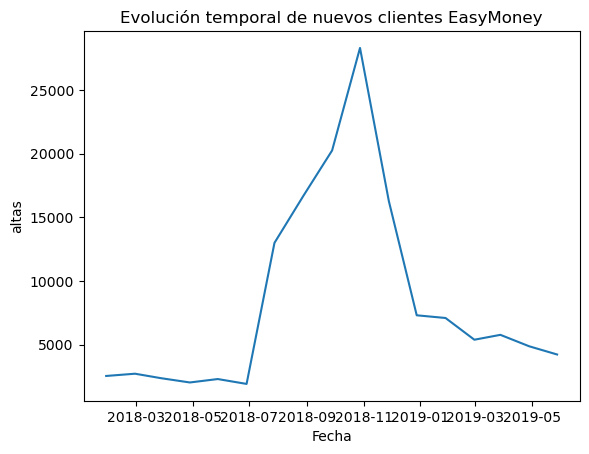

In [94]:
plt.plot(df_clientes_nuevos['pk_partition'],df_clientes_nuevos['new_client'])
plt.title('Evolución temporal de nuevos clientes EasyMoney')
plt.xlabel('Fecha')
plt.ylabel('altas')
plt.show()

### Altas y bajas

#### Altas y bajas generales

In [95]:
primeras_dif=['dif_debit_card',              
'dif_em_account_p',               
'dif_em_account_pp',              
'dif_em_acount',                  
'dif_emc_account',                
'dif_payroll',                   
'dif_payroll_account',            
'dif_funds',                      
'dif_long_term_deposit',         
'dif_mortgage',                   
'dif_pension_plan',               
'dif_securities',                
'dif_short_term_deposit',        
'dif_loans',                      
'dif_credit_card']

In [96]:
count_1 = {}
count_minus_1 = {}

# Iterar sobre las columnas en primeras_dif
for i in primeras_dif:
    # Contar el número de elementos igual a 1
    count_1[i] = np.sum(df[i] == 1)
    
    # Contar el número de elementos igual a -1
    count_minus_1[i] = np.sum(df[i] == -1)

# Mostrar los resultados
print("Conteo de 1:")
print(count_1)

print("\nConteo de -1:")
print(count_minus_1)

Conteo de 1:
{'dif_debit_card': 74206, 'dif_em_account_p': 0, 'dif_em_account_pp': 0, 'dif_em_acount': 125531, 'dif_emc_account': 14411, 'dif_payroll': 34858, 'dif_payroll_account': 22261, 'dif_funds': 916, 'dif_long_term_deposit': 4540, 'dif_mortgage': 10, 'dif_pension_plan': 37551, 'dif_securities': 1305, 'dif_short_term_deposit': 4373, 'dif_loans': 25, 'dif_credit_card': 11072}

Conteo de -1:
{'dif_debit_card': 55524, 'dif_em_account_p': 0, 'dif_em_account_pp': 0, 'dif_em_acount': 50919, 'dif_emc_account': 5001, 'dif_payroll': 26792, 'dif_payroll_account': 9375, 'dif_funds': 389, 'dif_long_term_deposit': 3388, 'dif_mortgage': 2, 'dif_pension_plan': 29154, 'dif_securities': 455, 'dif_short_term_deposit': 5339, 'dif_loans': 14, 'dif_credit_card': 9689}


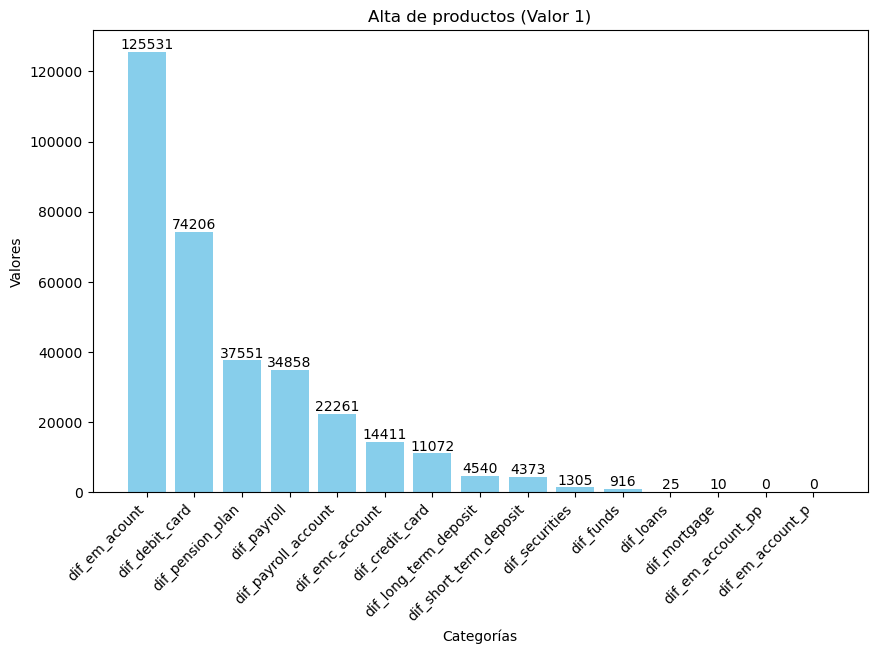

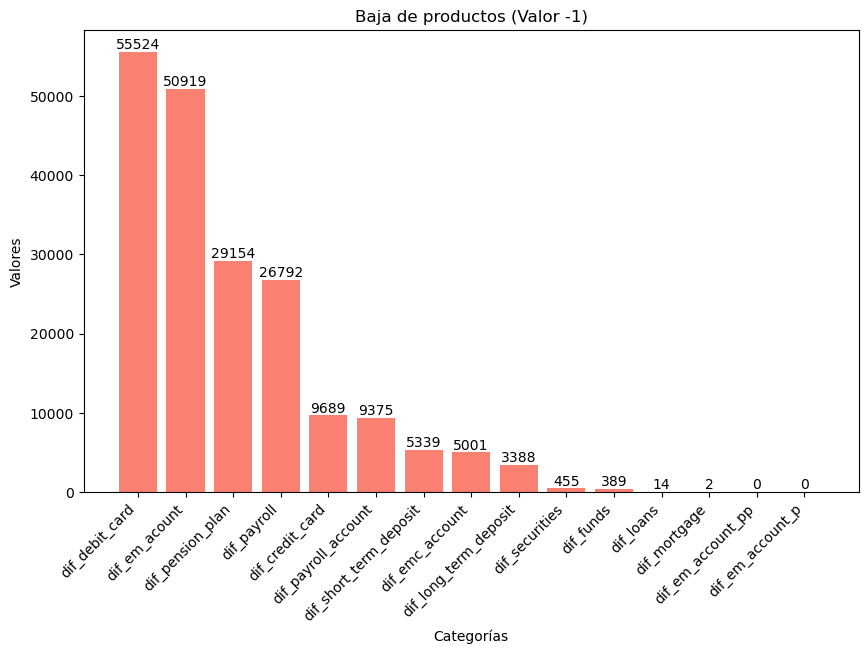

In [97]:
import matplotlib.pyplot as plt

# Supongamos que tienes los resultados almacenados en count_1 y count_minus_1

# Crear gráfico de barras para 1
nombres_1, valores_1 = zip(*count_1.items())
sorted_data_1 = sorted(zip(valores_1, nombres_1), reverse=True)
valores_1, nombres_1 = zip(*sorted_data_1)

fig, ax1 = plt.subplots(figsize=(10, 6))
bars_1 = ax1.bar(nombres_1, valores_1, color='skyblue')
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Alta de productos (Valor 1)')

for bar in bars_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()

# Crear gráfico de barras para -1
nombres_minus_1, valores_minus_1 = zip(*count_minus_1.items())
sorted_data_minus_1 = sorted(zip(valores_minus_1, nombres_minus_1), reverse=True)
valores_minus_1, nombres_minus_1 = zip(*sorted_data_minus_1)

fig, ax2 = plt.subplots(figsize=(10, 6))
bars_minus_1 = ax2.bar(nombres_minus_1, valores_minus_1, color='salmon')
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Baja de productos (Valor -1)')

for bar in bars_minus_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()


In [98]:
resultados=[]
for col_name in primeras_dif:
    try:
        col_index = df.columns.get_loc(col_name)
        nombre_columna = col_name
        suma_columna = df[col_name].sum()
        resultados.append((nombre_columna, suma_columna))
    except KeyError:
        print(f"La columna '{col_name}' no se encuentra en el DataFrame.")

# Imprimir la lista de resultados
print(resultados)

[('dif_debit_card', 18682), ('dif_em_account_p', 0), ('dif_em_account_pp', 0), ('dif_em_acount', 74612), ('dif_emc_account', 9410), ('dif_payroll', 8066), ('dif_payroll_account', 12886), ('dif_funds', 527), ('dif_long_term_deposit', 1152), ('dif_mortgage', 8), ('dif_pension_plan', 8397), ('dif_securities', 850), ('dif_short_term_deposit', -966), ('dif_loans', 11), ('dif_credit_card', 1383)]


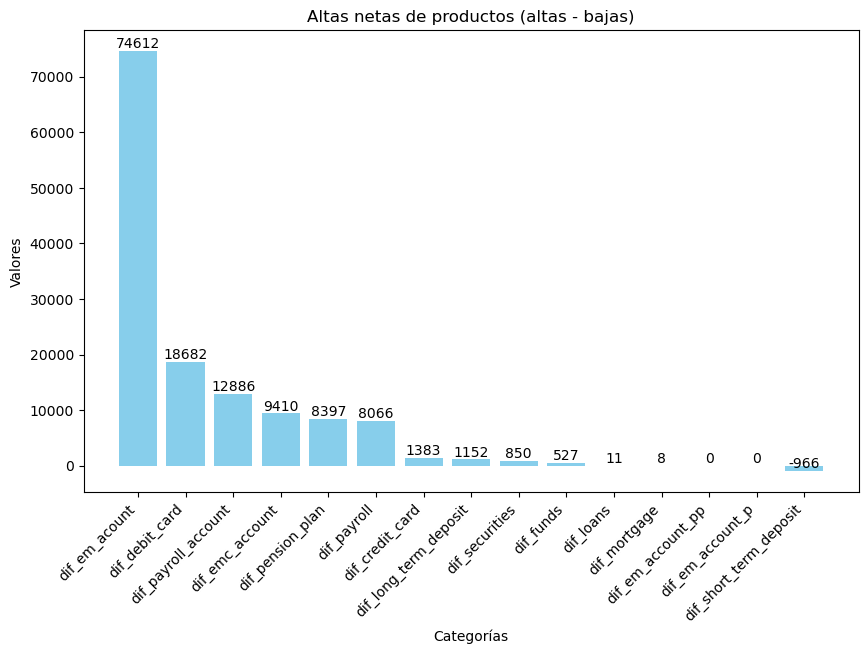

In [99]:
import matplotlib.pyplot as plt

nombres, valores = zip(*resultados)

# Ordenar los datos en forma descendente
sorted_data = sorted(zip(valores, nombres), reverse=True)
valores, nombres = zip(*sorted_data)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(nombres, valores, color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Altas netas de productos (altas - bajas)')

# Mostrar los valores en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


Podemos ver que el producto estrella es el em account, seguido por la tarjeta de débito. En cuanto a los productos menos populares, encontramos la em account pp y em account p. Dado que son productos por los cuales sólo obtenemos 10 euros, podemos sugerir eliminarlos.

#### Altas y bajas totales por producto

In [100]:
productos=['loans', 'mortgage', 'funds', 'securities',
           'long_term_deposit', 'em_account_pp', 'credit_card',
           'payroll', 'pension_plan', 'payroll_account', 'emc_account',
           'debit_card', 'em_account_p', 'em_acount', 'short_term_deposit']

In [101]:
def grafico_altas_bajas_mensuales (dataset, variable):
    fig = plt.figure(figsize = (10, 8))
    altas_=dataset[dataset['dif_'+variable] == 1].groupby(['pk_partition'])['dif_'+variable].count()
    bajas_=dataset[dataset['dif_'+variable] == -1].groupby(['pk_partition'])['dif_'+variable].count()
    # No tenemos informacion de esto parfa el primer mes
    #totales_=dataset[dataset['pk_partition'] > '2018-02-01'].groupby(['pk_partition'])['dif_'+variable].sum() 
    totales_=dataset.groupby(['pk_partition'])['dif_'+variable].sum()
    # Pintamos:
    locs, labels = plt.xticks()
    plt.setp(labels,rotation=45)
    plt.plot(altas_, color = "green", label = "Altas mensuales")
    plt.plot(bajas_, color = "red", label = "Bajas mensuales")
    plt.plot(totales_, color = "blue", label = "Total mensuales")
    plt.title("Ventas mensuales de: "+variable)
    plt.legend()

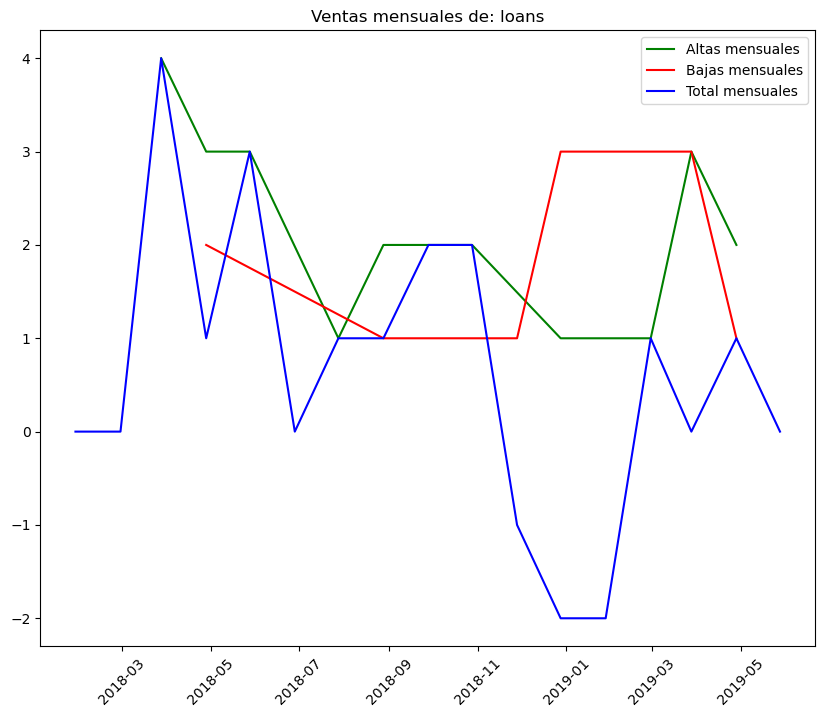

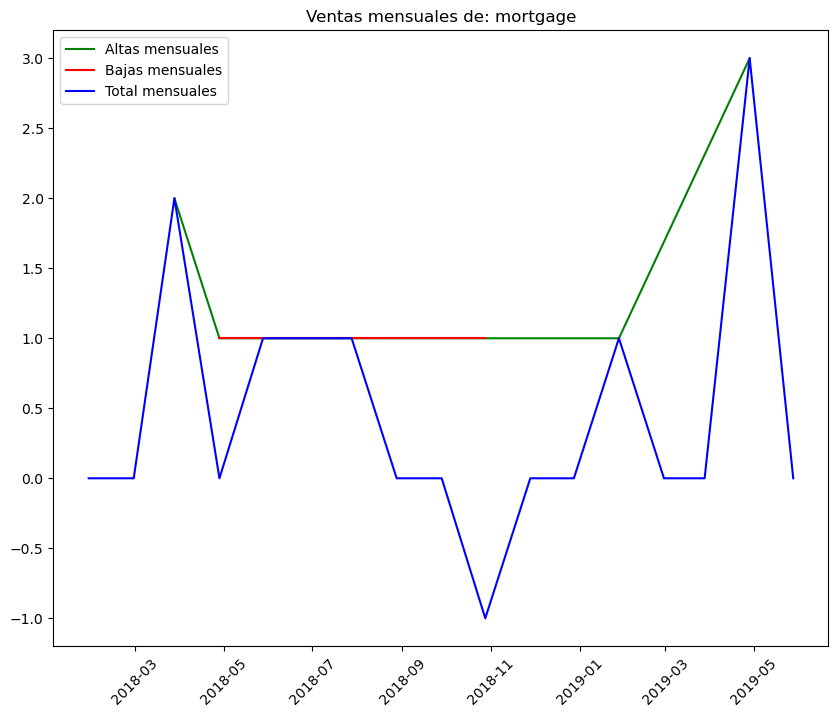

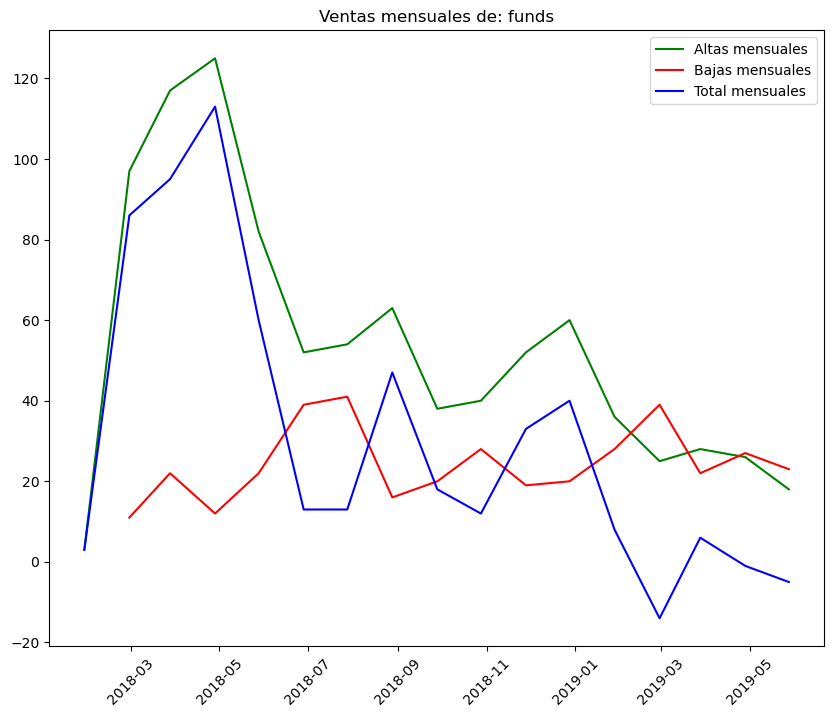

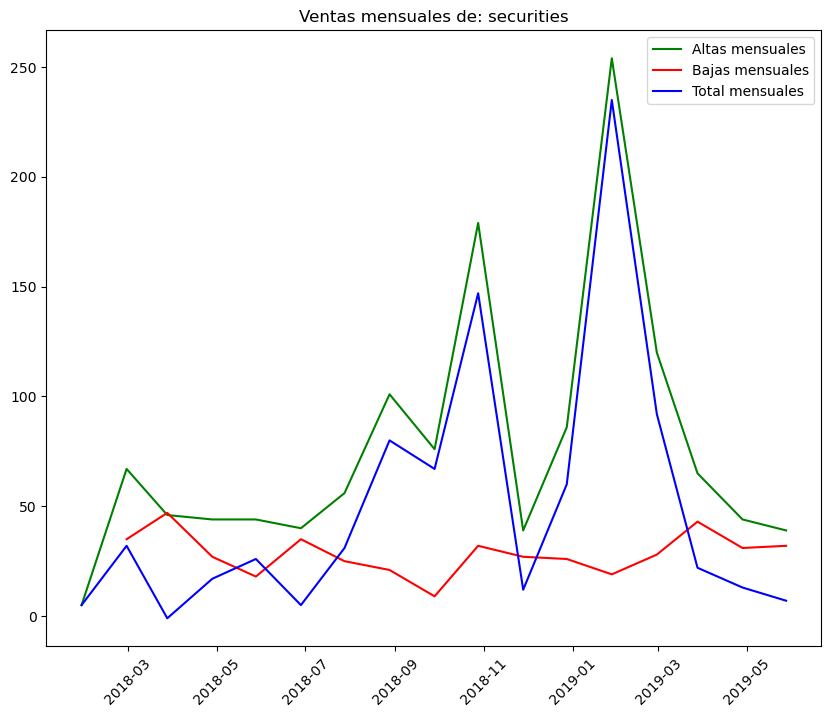

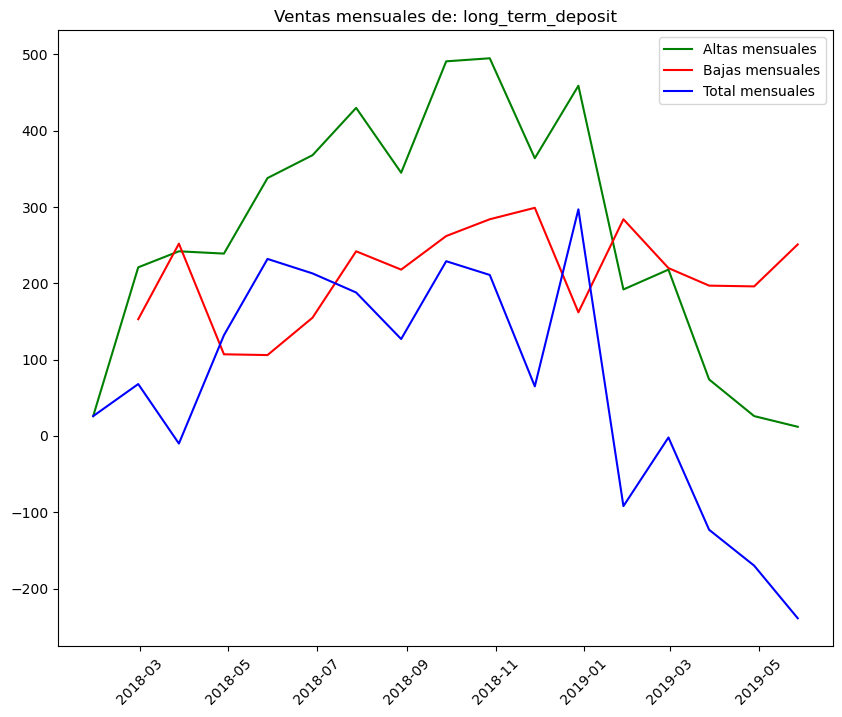

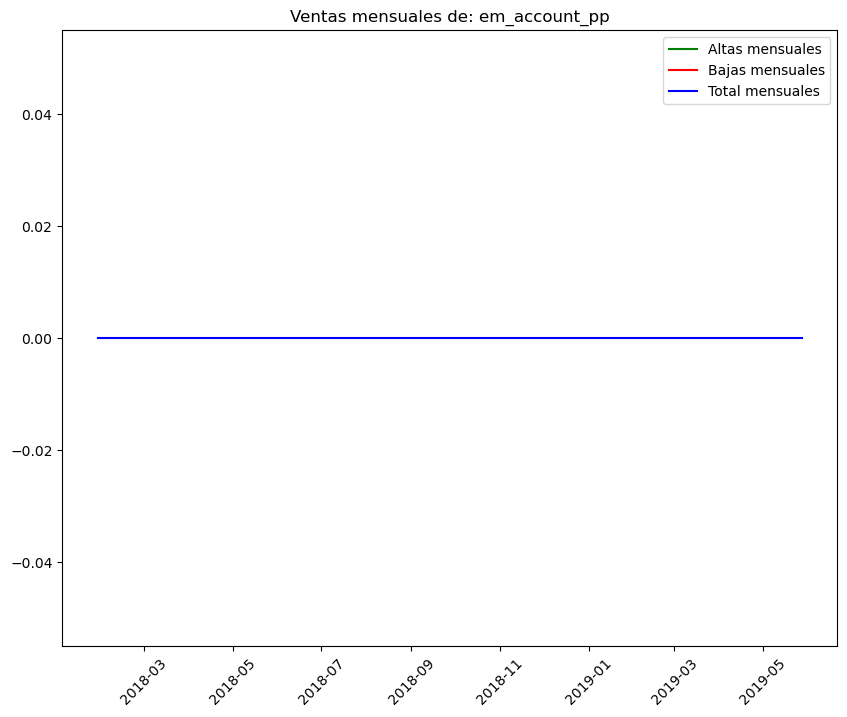

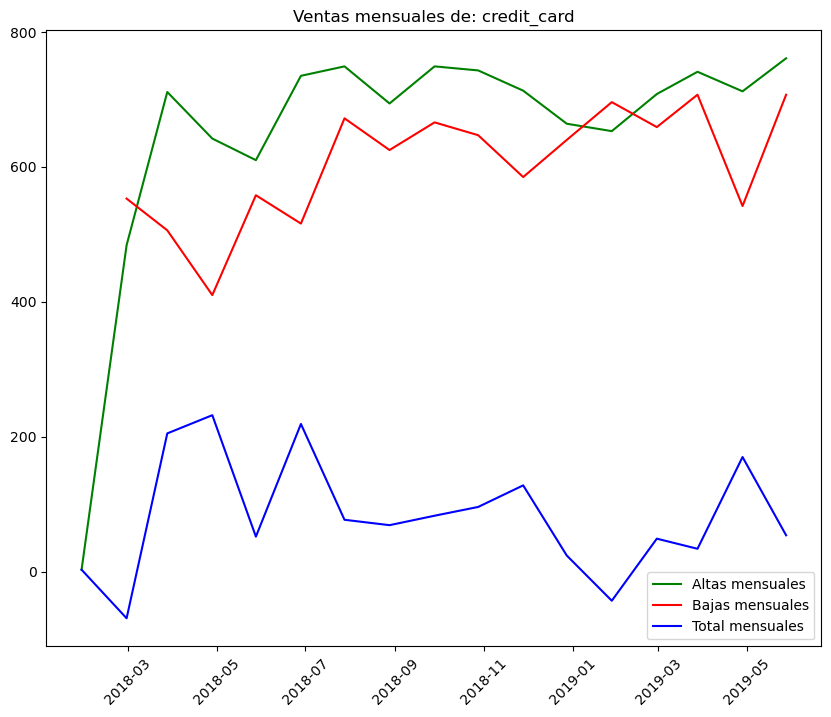

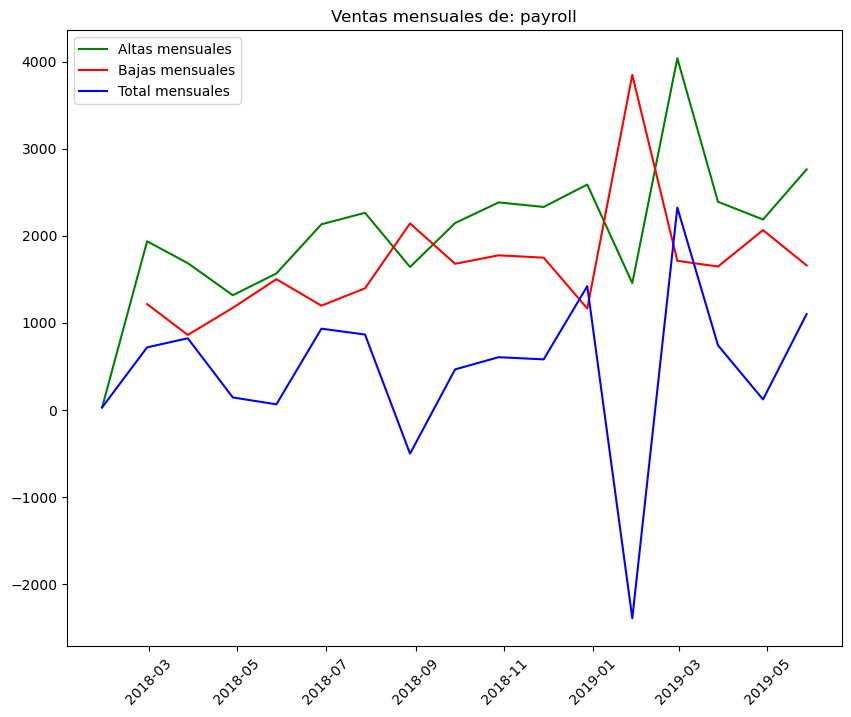

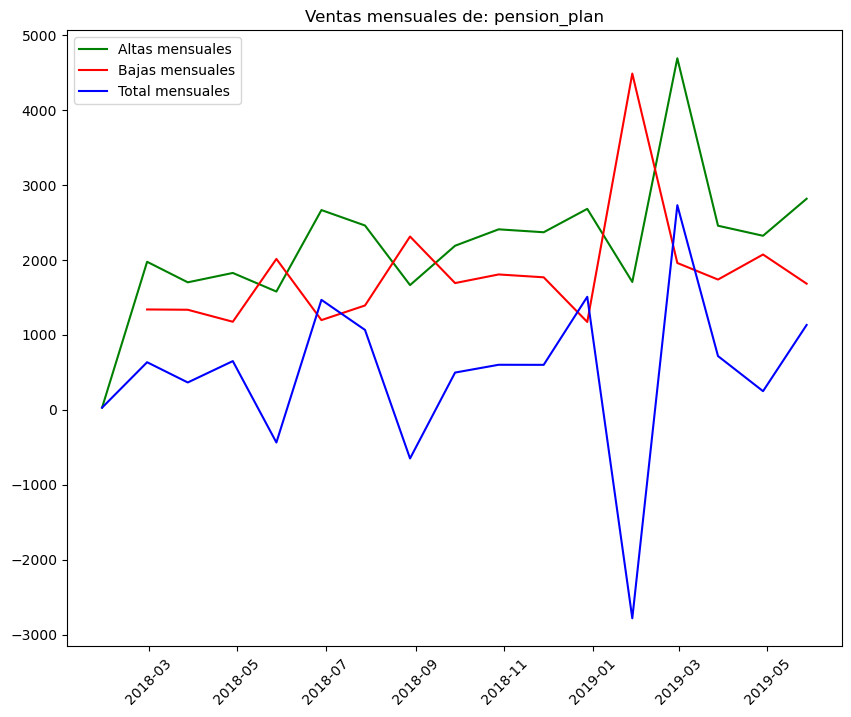

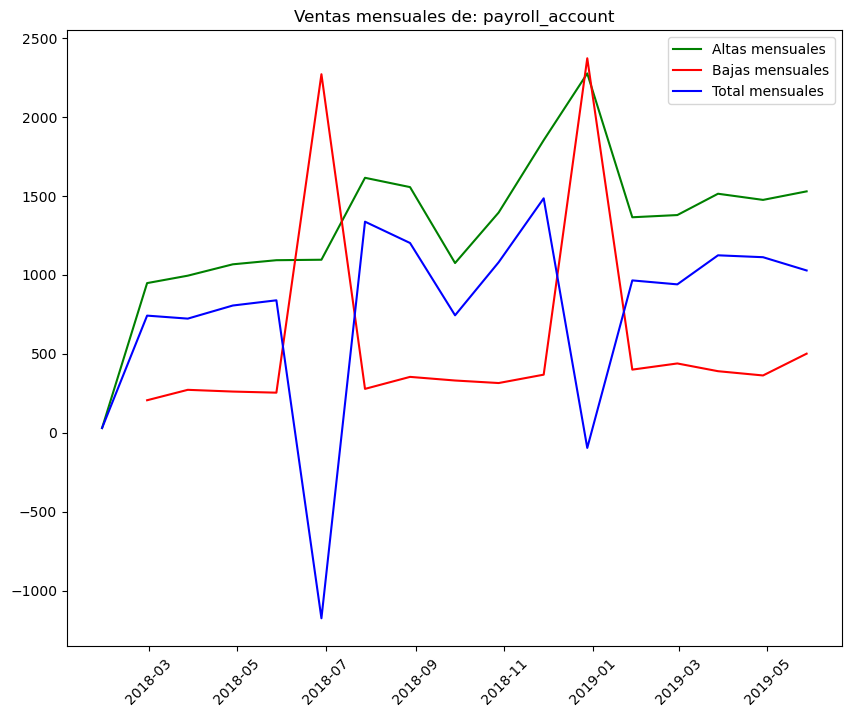

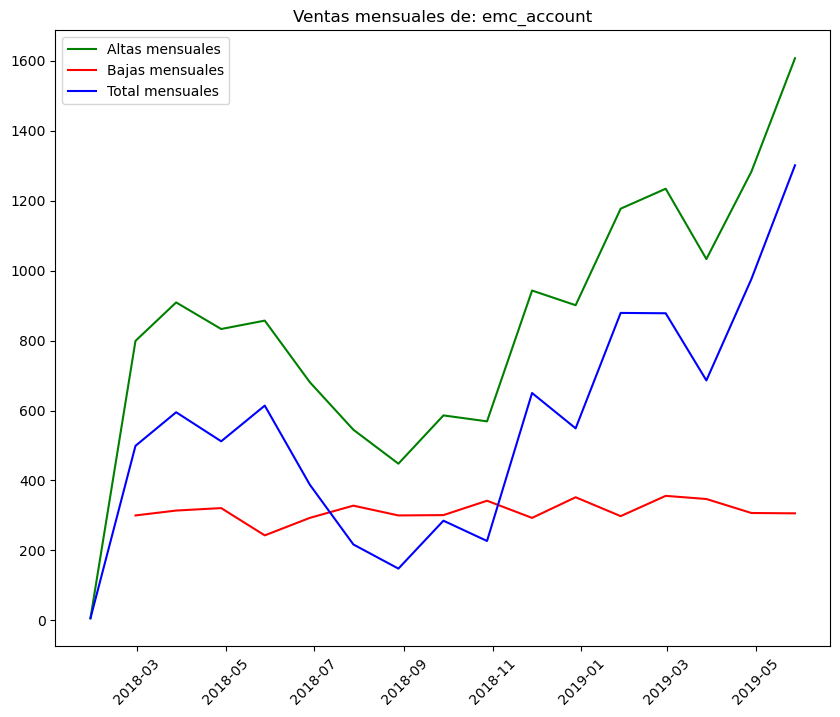

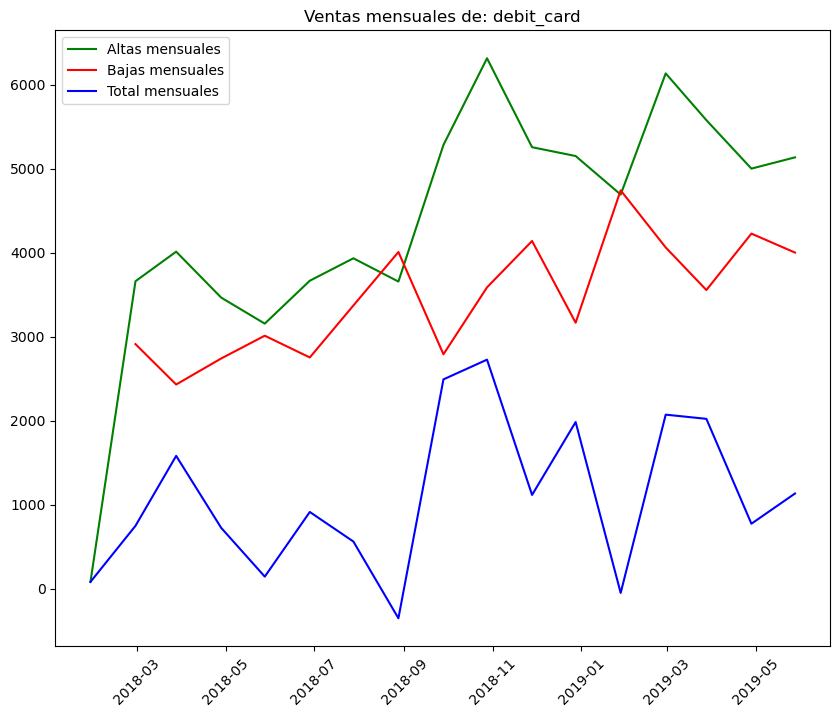

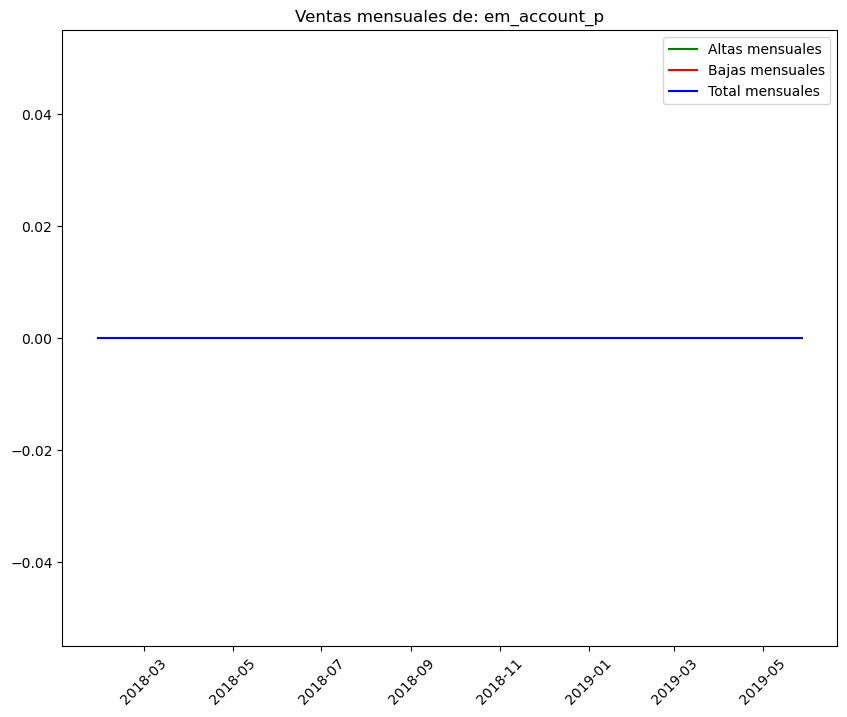

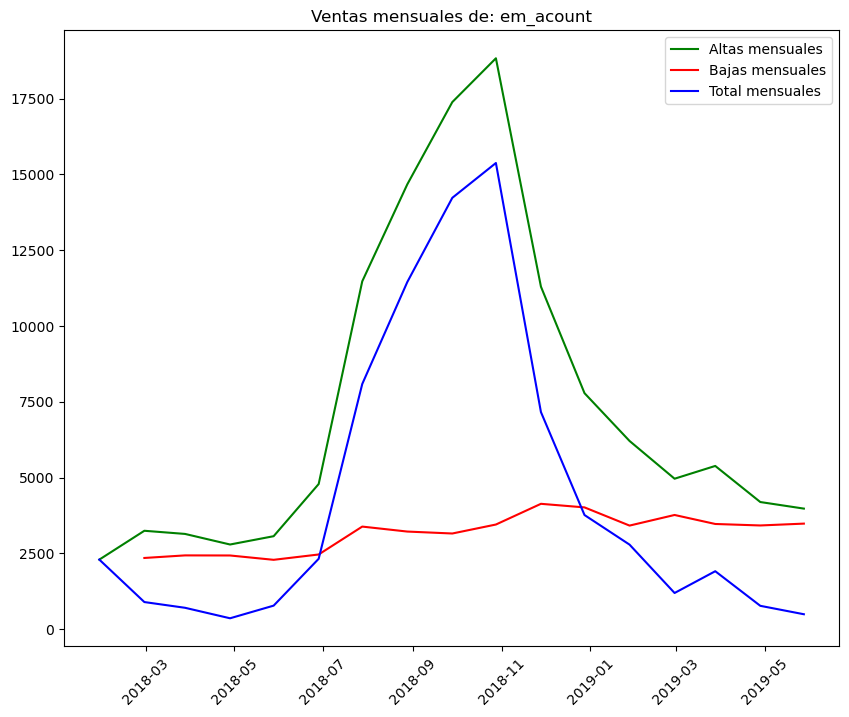

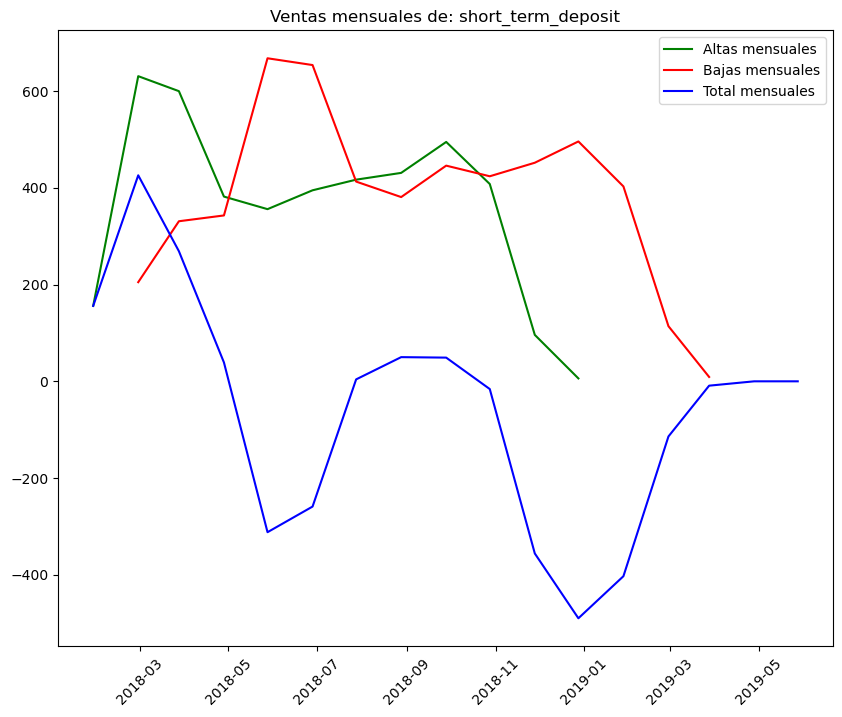

In [102]:
for i in productos:
    grafico_altas_bajas_mensuales(df,i)

### Agrupación por tipos de productos

Queremos hacer un análisis agregado de los productos ofertados, por lo que conviene clasificarlos en 3 categorías: cuentas, ahorro_inversión y financiación

In [103]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,cliente_activo
0,15891,2018-07-28,2018-07-28,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,59,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,1,0.0,1
1,15891,2018-08-28,2018-07-28,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,59,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,1.000000,0,0,0.0,1
2,16063,2018-11-28,2018-11-19,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.290323,1,0,0.0,0
3,16063,2018-12-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.258065,0,0,0.0,0
4,16063,2019-01-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.258065,0,0,0.0,0


In [104]:
# Defino la clasificación de productos
clasificacion = {'cuenta': ['dif_payroll', 'dif_payroll_account', 'dif_emc_account', 'dif_debit_card', 'dif_em_account_p', 'dif_em_acount', 'dif_em_account_pp'],
                 'ahorro_inversion': ['dif_funds', 'dif_securities', 'dif_long_term_deposit'],
                 'financiacion': ['dif_short_term_deposit', 'dif_loans', 'dif_mortgage', 'dif_credit_card']}

In [105]:
# Crear columnas para cada categoría y establecer valores iniciales en 0
for categoria in clasificacion.keys():
    df[categoria] = 0

# Asignar 1 si el cliente tiene el producto correspondiente a la categoría
for categoria, productos in clasificacion.items():
    df[categoria] = df[productos].sum(axis=1)


In [106]:
df.sample(10)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,cliente_activo,cuenta,ahorro_inversion,financiacion
2955528,1228915,2018-01-28,2016-12-04,KHE,0,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,30.0,H,21,0,57953.01,Murcia,salario_bajo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.548387,0,1,0.0,1,0,0,0
3553672,1283439,2019-05-28,2017-07-29,KHE,1,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,H,22,0,122528.94,Barcelona,salario_medioalto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.548387,0,1,0.0,1,0,0,0
2707747,1209934,2018-04-28,2016-10-28,KHE,0,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,45.0,H,25,0,191303.07,Toledo,salario_alto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.645161,0,1,0.0,1,0,0,0
2627325,1204184,2018-11-28,2016-10-22,KFC,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,3.0,V,29,0,58669.44,Alicante,salario_bajo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.741935,0,2,0.0,1,0,0,0
3276819,1260282,2018-01-28,2017-05-28,KFC,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,39.0,V,24,0,52045.50,Cantabria,salario_bajo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.903226,0,1,0.0,1,0,0,0
4806712,1380999,2018-08-28,2018-02-06,KHL,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,36,0,108592.68,Madrid,salario_medioalto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.548387,0,1,0.0,1,0,0,0
4748339,1375360,2018-09-28,2018-01-12,KHK,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,30.0,V,42,0,-999.00,Murcia,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.354839,0,1,0.0,1,0,0,0
3029016,1235387,2018-10-28,2017-01-03,KFC,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,20.0,H,39,0,-999.00,Guipuzcoa,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.387097,0,1,0.0,1,0,0,0
5547335,1468854,2019-02-28,2018-10-05,KHQ,0,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,43.0,H,25,0,-999.00,Tarragona,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.709677,0,0,0.0,0,0,0,0
3452101,1275891,2019-03-28,2017-07-23,KHE,1,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,V,21,0,258646.89,Barcelona,salario_alto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.774194,0,1,0.0,1,0,0,0


In [107]:
df_categorias=df.groupby('pk_partition')[['cuenta','ahorro_inversion','financiacion']].sum().reset_index()

En el último año (2019) podemos observar que se han dado bastantes bajas de productos de ahorro e inversión:

In [108]:
df_categorias.tail()

,pk_partition,cuenta,ahorro_inversion,financiacion
12,2019-01-28,2196,151,-447
13,2019-02-28,7411,76,-64
14,2019-03-28,6490,-95,25
15,2019-04-28,3757,-158,174
16,2019-05-28,5060,-237,54


Podemos observar que las cuentas son los productos más populares:

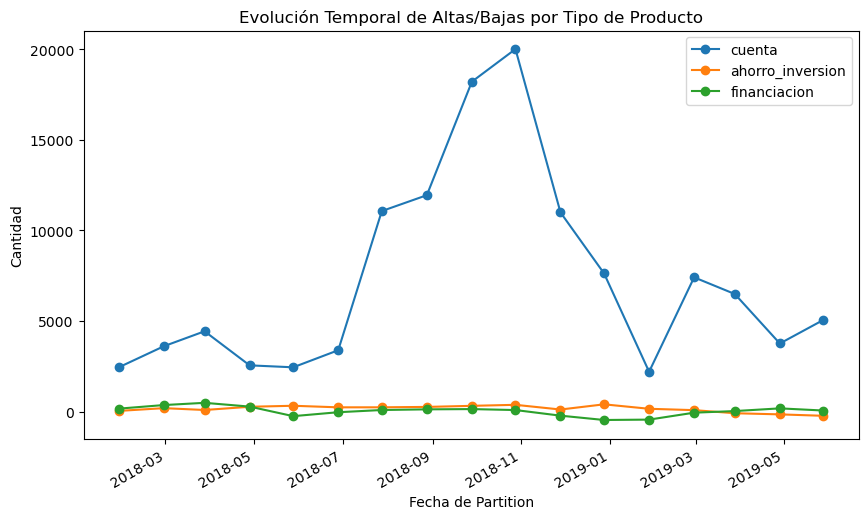

In [109]:
# Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotear las series temporales
df_categorias.plot(x='pk_partition', y=['cuenta', 'ahorro_inversion', 'financiacion'], kind='line', ax=ax, marker='o')

# Configurar etiquetas y título
plt.title('Evolución Temporal de Altas/Bajas por Tipo de Producto')
plt.xlabel('Fecha de Partition')
plt.ylabel('Cantidad')

# Mostrar leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

Si analizamos ahorro_inversión y financiación por separado (queremos ajustar la escala pero no podemos usar logaritmo porque hay valores negativos), observamos una fuerte caída de los productos de financiación en abril mayo de 2018 y en noviembre de 2018 hasta febrero marzo de 2019 (donde empieza a remontar). En cuanto a los productos de ahorro/inversión, podemos observar una tendencia decreciente en el último periodo de la muestra.

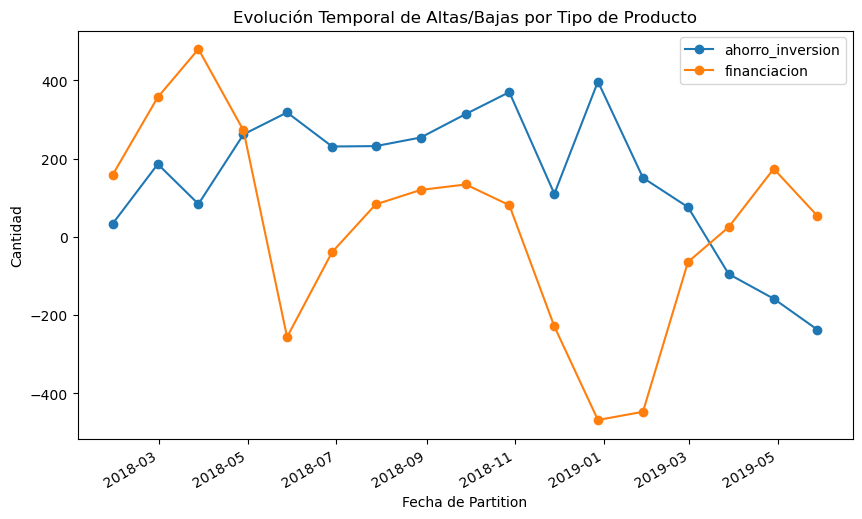

In [110]:
# Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotear las series temporales
df_categorias.plot(x='pk_partition', y=['ahorro_inversion', 'financiacion'], kind='line', ax=ax, marker='o')

# Configurar etiquetas y título
plt.title('Evolución Temporal de Altas/Bajas por Tipo de Producto')
plt.xlabel('Fecha de Partition')
plt.ylabel('Cantidad')

# Mostrar leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

### Evolución de ingresos por producto

In [111]:
ingresos={'debit_card':10 ,              
'em_account_p':10 ,               
'em_account_pp':10 ,              
'em_acount':10 ,                  
'emc_account':10 ,                
'payroll':10 ,                   
'payroll_account':10 ,            
'funds':40 ,                      
'long_term_deposit':40 ,         
'mortgage':40 ,                   
'pension_plan':40 ,               
'securities':40 ,                
'short_term_deposit':40 ,        
'loans':60 ,                      
'credit_card':60 }

In [112]:
productos_mes=df.groupby("pk_partition").agg(short_term_deposit = ("short_term_deposit", "sum"),
                                        loans = ("loans", "sum"),
                                        mortgage = ("mortgage", "sum"),
                                        funds = ("funds", "sum"),
                                        securities = ("securities", "sum"),
                                        long_term_deposit = ("long_term_deposit", "sum"),
                                        em_account_pp = ("em_account_pp", "sum"),
                                        credit_card = ("credit_card", "sum"),
                                        payroll = ("payroll", "sum"),
                                        pension_plan = ("pension_plan", "sum"),
                                        payroll_account = ("payroll_account", "sum"),
                                        emc_account = ("emc_account", "sum"),
                                        debit_card = ("debit_card", "sum"),
                                        em_account_p = ("em_account_p", "sum"),
                                        em_acount = ("em_acount", "sum"))

for x in ingresos:
    productos_mes[x] = productos_mes[x] * ingresos[x]

<Figure size 1600x800 with 0 Axes>

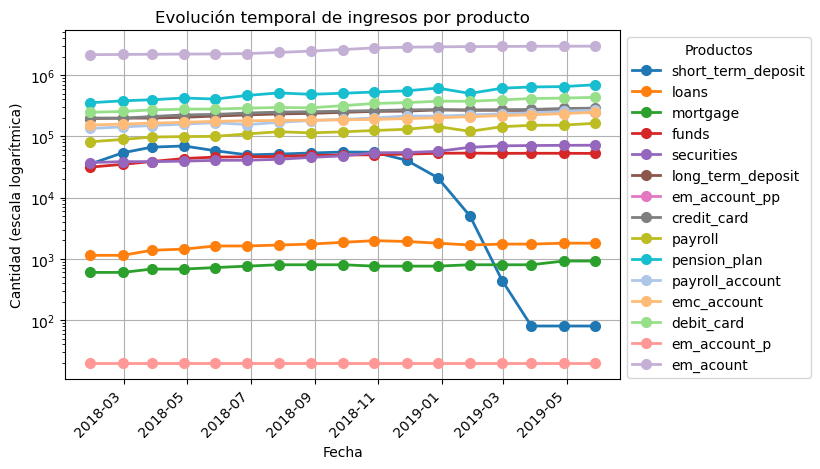

In [113]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']
plt.figure(figsize=(16, 8))

productos_mes.plot(kind='line', marker='o', markersize=7, linewidth=2, color= custom_colors)
plt.yscale('log')  # Escala logarítmica en el eje y
plt.title('Evolución temporal de ingresos por producto')
plt.xlabel('Fecha')
plt.ylabel('Cantidad (escala logarítmica)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Productos', bbox_to_anchor=(1, 1))
plt.show()

Si hacemos un análisis más detallado, podemos observar una importante caída de los depósitos a corto plazo.

### Análisis temporal de productos por regiones principales

Conviene analizar la evolución temporal de los 3 tipos de producto en las regiones de España que generan más ingresos.

In [114]:
df_regiones_ppales=df.query("region_name == ['Madrid','Barcelona','Valencia', 'Murcia']")
# Agrupar por pk_partition y region_name y sumar las cantidades
df_categorias_region = df.groupby(['pk_partition', 'region_name'])[['cuenta', 'ahorro_inversion', 'financiacion']].sum().reset_index()

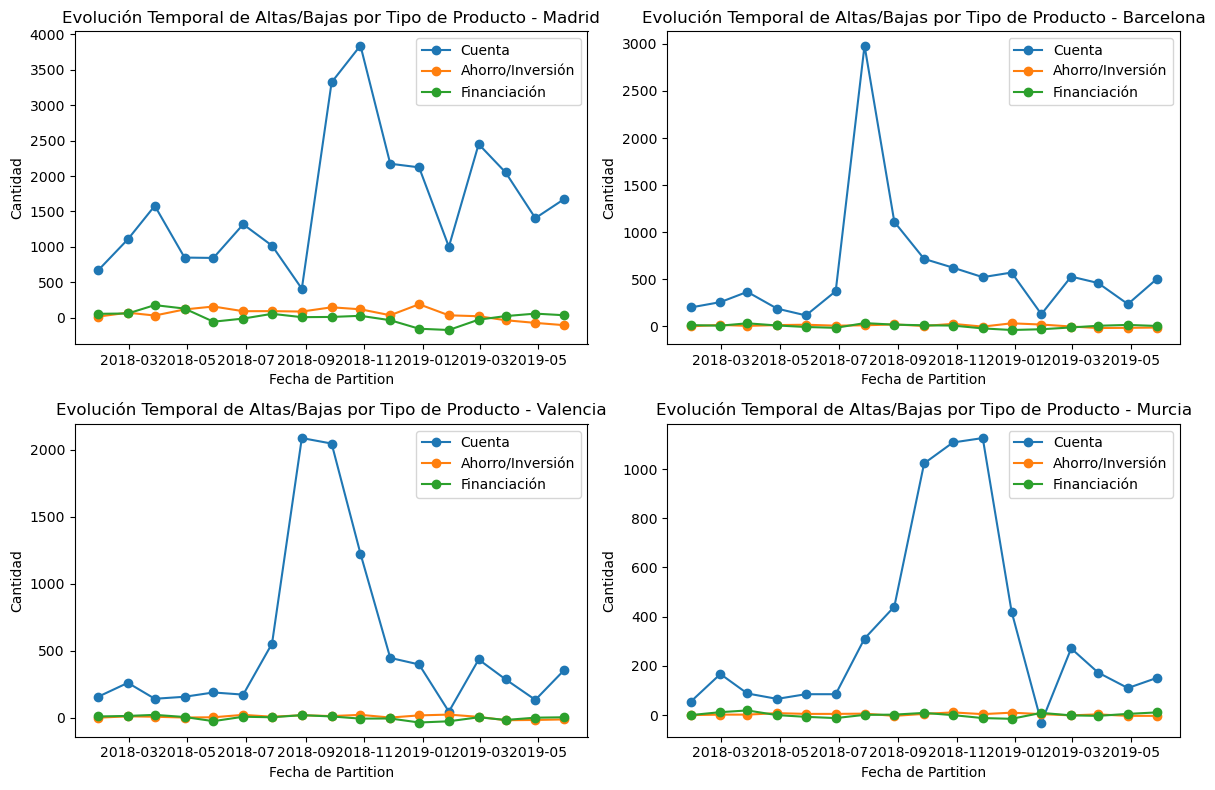

In [115]:
# Configurar el gráfico con subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()

# Iterar sobre las regiones y plotear los datos correspondientes en cada subplot
for i, region in enumerate(df_regiones_ppales['region_name'].unique()):
    region_data = df_categorias_region[df_categorias_region['region_name'] == region]
    axs[i].plot(region_data['pk_partition'], region_data['cuenta'], marker='o', label='Cuenta')
    axs[i].plot(region_data['pk_partition'], region_data['ahorro_inversion'], marker='o', label='Ahorro/Inversión')
    axs[i].plot(region_data['pk_partition'], region_data['financiacion'], marker='o', label='Financiación')
    
    # Configurar etiquetas y título para cada subplot
    axs[i].set_title(f'Evolución Temporal de Altas/Bajas por Tipo de Producto - {region}')
    axs[i].set_xlabel('Fecha de Partition')
    axs[i].set_ylabel('Cantidad')
    axs[i].legend(loc='upper right')

# Ajustar el espacio entre subplots para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


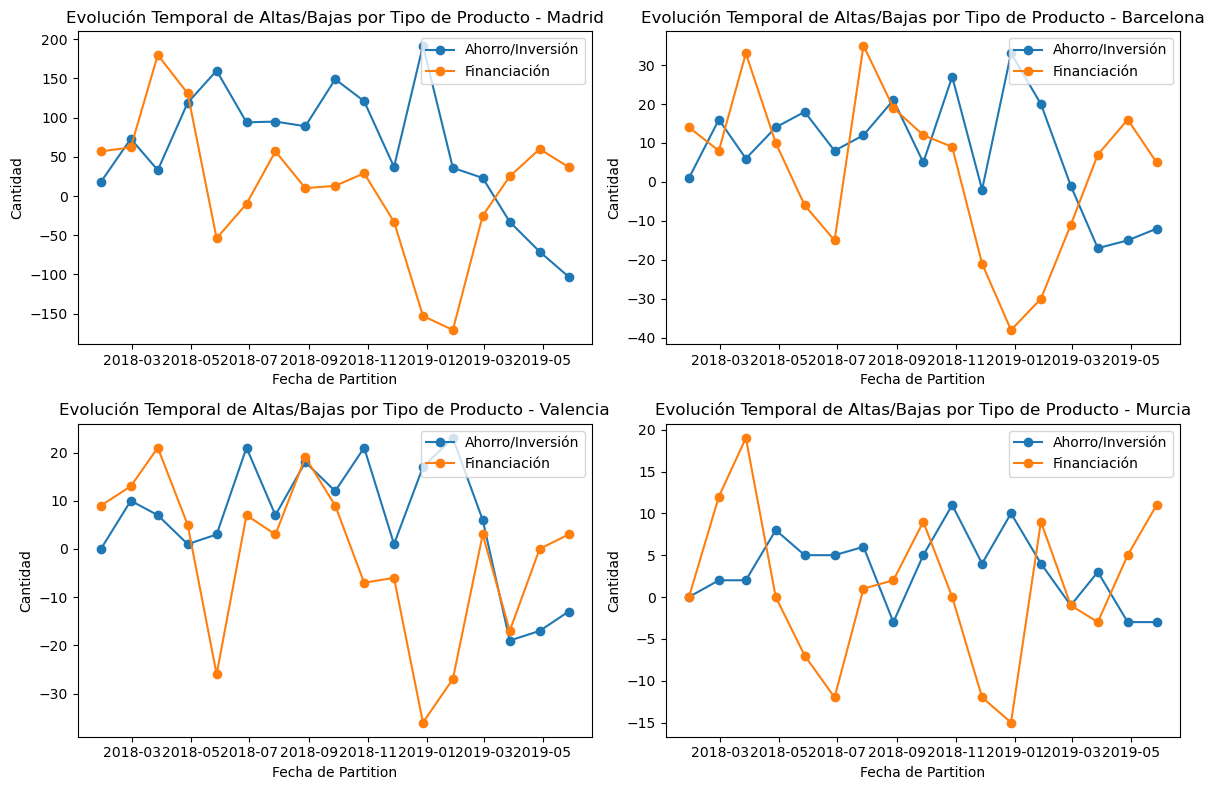

In [116]:
# Configurar el gráfico con subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()

# Iterar sobre las regiones y plotear los datos correspondientes en cada subplot
for i, region in enumerate(df_regiones_ppales['region_name'].unique()):
    region_data = df_categorias_region[df_categorias_region['region_name'] == region]
    axs[i].plot(region_data['pk_partition'], region_data['ahorro_inversion'], marker='o', label='Ahorro/Inversión')
    axs[i].plot(region_data['pk_partition'], region_data['financiacion'], marker='o', label='Financiación')
    
    # Configurar etiquetas y título para cada subplot
    axs[i].set_title(f'Evolución Temporal de Altas/Bajas por Tipo de Producto - {region}')
    axs[i].set_xlabel('Fecha de Partition')
    axs[i].set_ylabel('Cantidad')
    axs[i].legend(loc='upper right')

# Ajustar el espacio entre subplots para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Análisis temporal de altas y bajas de productos por categoría salarial

In [117]:
df_categorias_salario = df.groupby(['pk_partition', 'salary_categ'])[['cuenta', 'ahorro_inversion', 'financiacion']].sum().reset_index()

In [118]:
df_categorias_salario.head()

,pk_partition,salary_categ,cuenta,ahorro_inversion,financiacion
0,2018-01-28,Desconocido,440,3,33
1,2018-01-28,salario_alto,489,12,38
2,2018-01-28,salario_bajo,468,3,18
3,2018-01-28,salario_medioalto,518,9,36
4,2018-01-28,salario_mediobajo,529,7,34


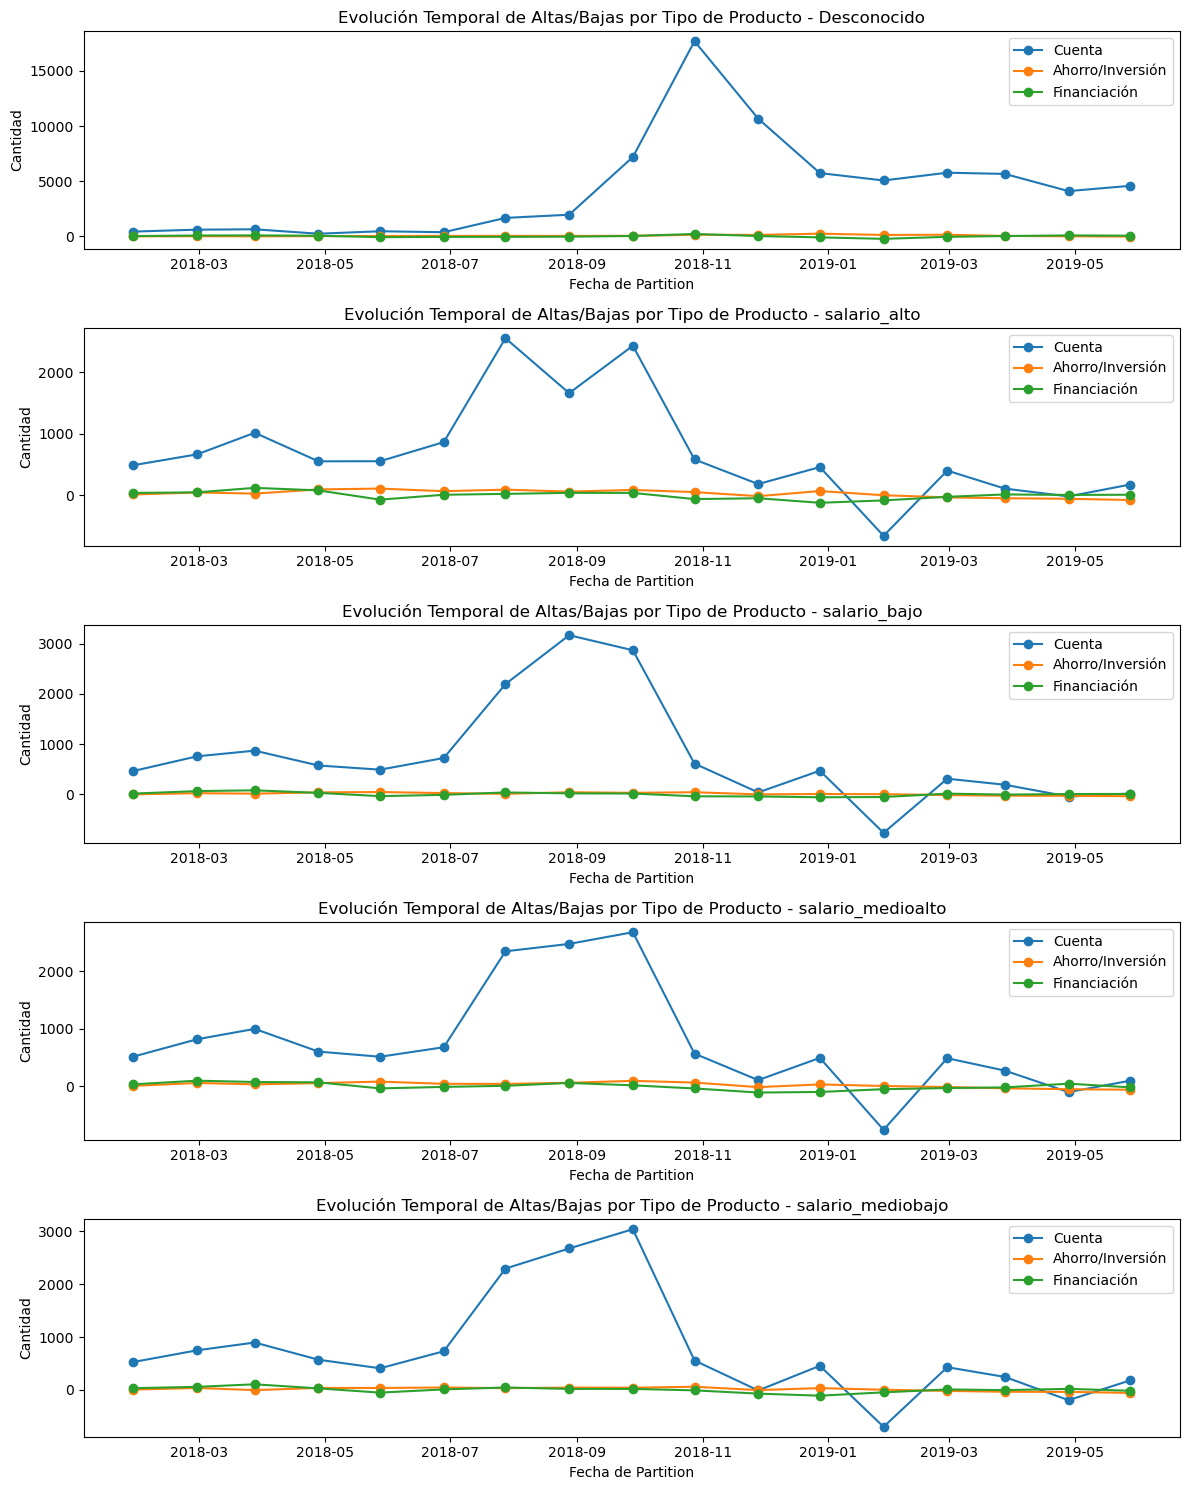

In [119]:
# Obtener las categorías únicas de salario
categorias_salario = df_categorias_salario['salary_categ'].unique()

# Configurar el gráfico con subplots
num_subplots = len(categorias_salario)  # Dejar que el número de subgráficos sea igual al número de categorías
fig, axs = plt.subplots(nrows=num_subplots, ncols=1, figsize=(12, 3 * num_subplots))
axs = axs.flatten()

# Iterar sobre las categorías de salario y plotear los datos correspondientes en cada subplot
for i, categ in enumerate(categorias_salario):
    salary_data = df_categorias_salario[df_categorias_salario['salary_categ'] == categ]
    axs[i].plot(salary_data['pk_partition'], salary_data['cuenta'], marker='o', label='Cuenta')
    axs[i].plot(salary_data['pk_partition'], salary_data['ahorro_inversion'], marker='o', label='Ahorro/Inversión')
    axs[i].plot(salary_data['pk_partition'], salary_data['financiacion'], marker='o', label='Financiación')
    
    # Configurar etiquetas y título para cada subplot
    axs[i].set_title(f'Evolución Temporal de Altas/Bajas por Tipo de Producto - {categ}')
    axs[i].set_xlabel('Fecha de Partition')
    axs[i].set_ylabel('Cantidad')
    axs[i].legend(loc='upper right')

# Ajustar el espacio entre subplots para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [120]:
df.to_pickle('EasyMoney_1.pkl', compression='zip')